<a href="https://www.kaggle.com/code/shariq20220/binary-prediction-of-poisonous-mushrooms?scriptVersionId=192733547" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

# import mplcursors  ## for hovering in graphs and getting value
warnings.filterwarnings('ignore')

## Checking availability of Datasets

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print("dirname:" , dirname)
    if len(filenames) == 0 :
        print("no file in the directory!! Please add a dataset ")  
        
    else:
        for filename in filenames:
            print(os.path.join(dirname, filename))
        
       
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

dirname: /kaggle/input
no file in the directory!! Please add a dataset 
dirname: /kaggle/input/playground-series-s4e8
/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


## Loading Datasets

In [3]:
data_train=pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")
data_test=pd.read_csv("/kaggle/input/playground-series-s4e8/test.csv")
data_sample_sub=pd.read_csv("/kaggle/input/playground-series-s4e8/sample_submission.csv")

## EDA on Training Dataset


In [4]:
data_train.shape

(3116945, 22)

In [5]:
data_train

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [7]:
data_train.describe(include = 'all')

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,3.116945e+06,3116945,3.116941e+06,3116905,2445922,3116933,3116937,2593009,1858510,3116888,...,359922,1136084,3116907,159452,375998,3116921,2988065,267263,3116900,3116945
unique,NaN,2,NaN,74,83,78,26,78,48,63,...,38,60,59,22,24,23,40,32,52,4
top,NaN,p,NaN,x,t,n,f,a,c,w,...,b,s,w,u,w,f,f,k,d,a
freq,NaN,1705396,NaN,1436026,460777,1359542,2569743,646034,1331054,931538,...,165801,327610,1196637,159373,279070,2368820,2477170,107310,2177573,1543321
mean,1.558472e+06,NaN,6.309848e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.997847e+05,NaN,4.657931e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,3.000000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.792360e+05,NaN,3.320000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.558472e+06,NaN,5.750000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.337708e+06,NaN,8.240000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_train.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

## EDA on Testing Dataset

In [9]:
data_test.shape

(2077964, 21)

In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), int64(1), object(17)
memory usage: 332.9+ MB


In [11]:
data_test.isna().sum()

id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          349821
gill-spacing             839595
gill-color                   49
stem-height                   1
stem-width                    0
stem-root               1838012
stem-surface            1321488
stem-color                   21
veil-type               1971545
veil-color              1826124
has-ring                     19
ring-type                 86195
spore-print-color       1899617
habitat                      25
season                        0
dtype: int64

In [12]:
data_test

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,u
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
2077961,5194906,5.73,x,e,e,f,a,NaN,w,6.16,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,NaN,s,g,NaN,NaN,f,f,NaN,d,a


## EDA on Sample_submission Dataset

In [13]:
data_sample_sub.shape

(2077964, 2)

# Pre-Processing Datasets

In [14]:
data_train2 = data_train.copy()
data_train2 = data_train.drop_duplicates()
data_train2.shape

(3116945, 22)

In [15]:
data_train2.isna().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [16]:
data_train2.isna().mean()*100

id                       0.000000
class                    0.000000
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
season                   0.000000
dtype: float64

In [17]:
miss70 = data_train2.isna().mean()*100
miss70[miss70>70]

stem-root            88.452732
veil-type            94.884350
veil-color           87.936970
spore-print-color    91.425482
dtype: float64

In [18]:
classes_with_id = data_train2[['id','class']]
classes_with_id.shape

(3116945, 2)

In [19]:
data_test2 = data_test.copy()
data_test2 = data_test.drop_duplicates()
data_test2.shape

(2077964, 21)

In [20]:
data_train2  = data_train2.drop(columns = {'stem-root','veil-type','veil-color','spore-print-color'}, axis =1)
print(data_train2.shape)
data_test2 = data_test2.drop(columns={'stem-root','veil-type','veil-color','spore-print-color'}, axis =1)
print(data_test2.shape)

(3116945, 18)
(2077964, 17)


In [21]:
train2_shape = data_train2.shape
test2_shape  = data_test2.shape
train2_shape,test2_shape,train2_shape[0],test2_shape[0]

((3116945, 18), (2077964, 17), 3116945, 2077964)

## Combining both train and test datasets for easier processing

In [22]:
com_data = pd.concat([data_train2,data_test2],ignore_index = True)
com_data

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194904,5194904,NaN,0.88,x,g,w,f,a,d,w,2.67,1.35,NaN,e,f,f,d,u
5194905,5194905,NaN,3.12,x,s,w,f,d,c,w,2.69,7.38,NaN,w,f,f,g,a
5194906,5194906,NaN,5.73,x,e,e,f,a,NaN,w,6.16,9.74,NaN,y,t,z,d,a
5194907,5194907,NaN,5.03,b,g,n,f,a,d,g,6.00,3.46,s,g,f,f,d,a


In [23]:
print(com_data.shape)
print()
print(com_data.isna().sum())
print()
print(com_data.info)



(5194909, 18)

id                            0
class                   2077964
cap-diameter                 11
cap-shape                    71
cap-surface             1117927
cap-color                    25
does-bruise-or-bleed         18
gill-attachment          873757
gill-spacing            2098030
gill-color                  106
stem-height                   1
stem-width                    0
stem-surface            3302349
stem-color                   59
has-ring                     43
ring-type                215075
habitat                      70
season                        0
dtype: int64

<bound method DataFrame.info of               id class  cap-diameter cap-shape cap-surface cap-color  \
0              0     e          8.80         f           s         u   
1              1     p          4.51         x           h         o   
2              2     e          6.94         f           s         b   
3              3     e          3.88         f           y         g   
4  

id


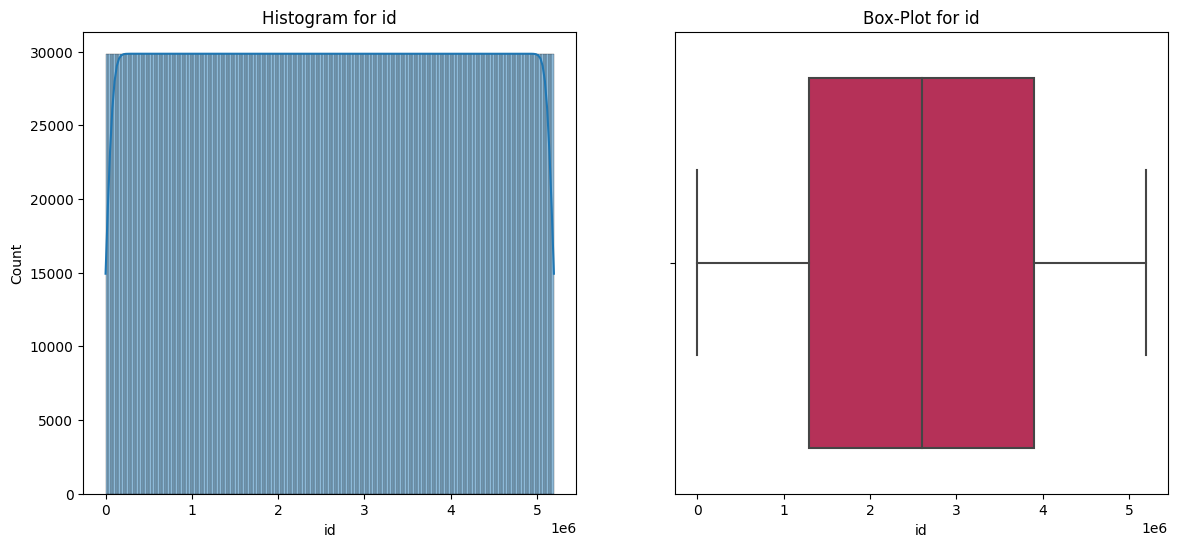

cap-diameter


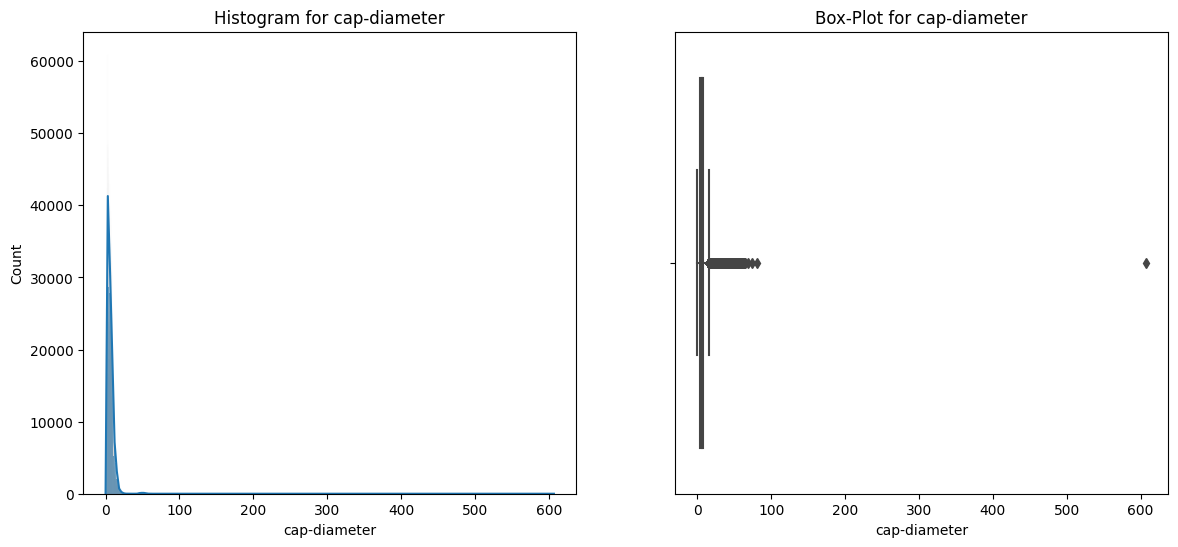

stem-height


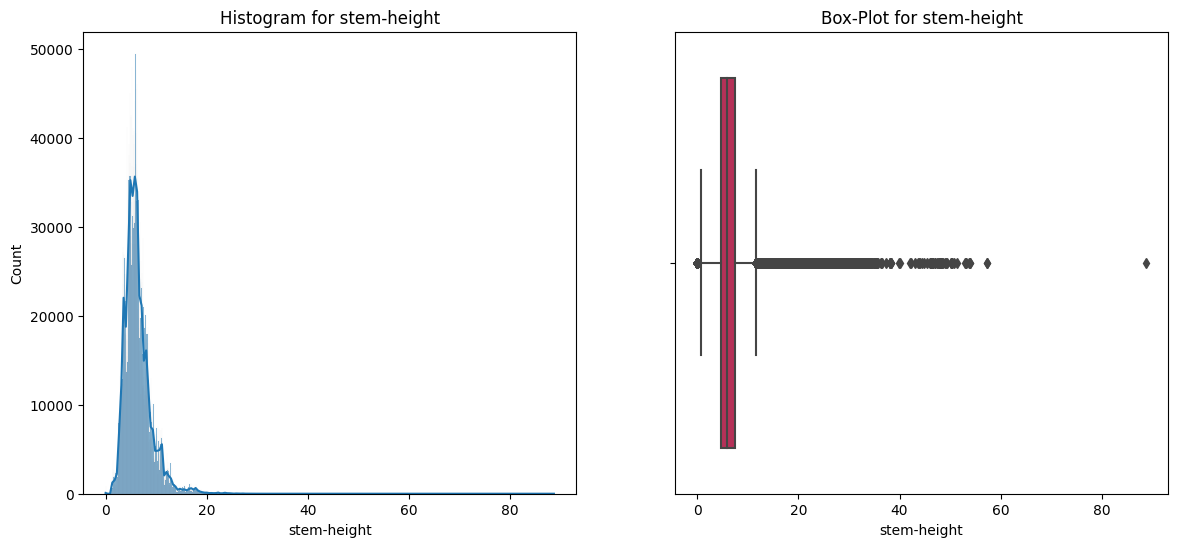

stem-width


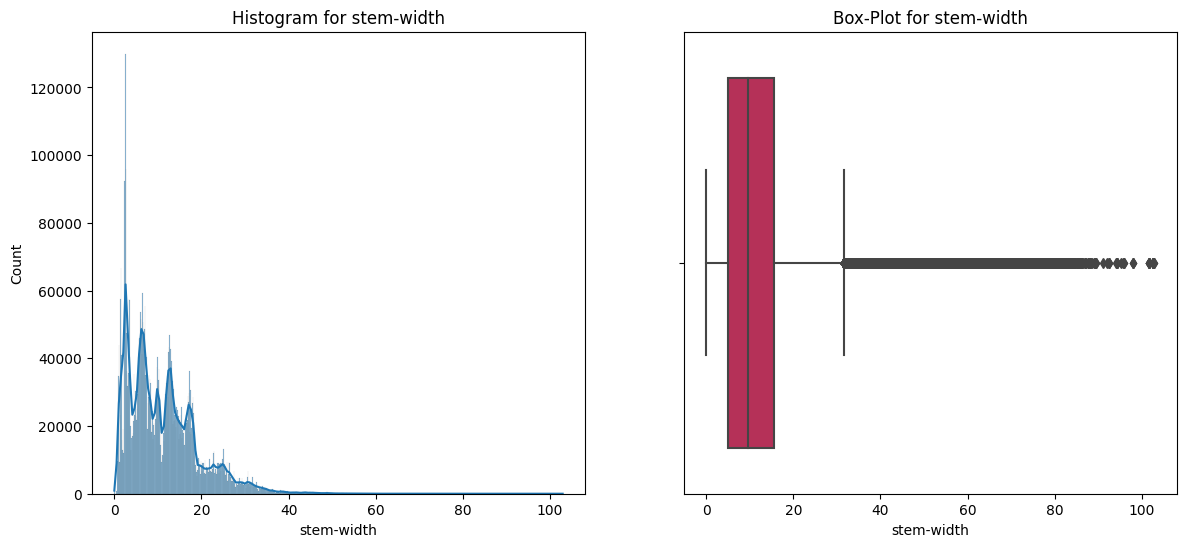

In [24]:
for column in com_data.select_dtypes(include = [np.number]).columns:
    print(column)
    
    plt.figure(figsize=(14,6))
    plt.tight_layout()
    
    plt.subplot(1,2,1)
    sns.histplot(data = com_data[f'{column}'],kde = True, palette = 'viridis')
    plt.xlabel(f'{column}')
    plt.axis()
    plt.title(f'Histogram for {column}')
    
    plt.subplot(1,2,2)
    sns.boxplot(data = com_data,x=com_data[f'{column}'],width = 0.8,palette = 'rocket',color = 'red')
    plt.xlabel(f'{column}')
    plt.title(f'Box-Plot for {column}')
    
    plt.show()

In [25]:
# import plotly.express as px

In [26]:
# for column in com_data.select_dtypes(include = [np.number]).columns:
#     print(column)
    
#     # Create a histogram with KDE overlay
#     fig = px.histogram(data_frame = com_data,
#                        x = column,
#                        marginal="violin", # Adds a KDE/violin plot on the side
#                        opacity=0.3,
#                        title='Histogram with KDE')

#     # Update layout for clarity
#     fig.update_layout(
#         xaxis_title= f'{column}',
#         yaxis_title='Count',
#         bargap=0.2,
#         showlegend=True
#     )

#     # Show the plot
#     fig.show()
    
    
    
#     fig2 =  px.box(data_frame = com_data, x = column,notched = True,orientation = 'h')
#     fig2.update_layout(xaxis_title = f'{column}',
#                        yaxis_title = 'Value',
#                        showlegend = True
#                       )
    
    
#     fig2.show()

class


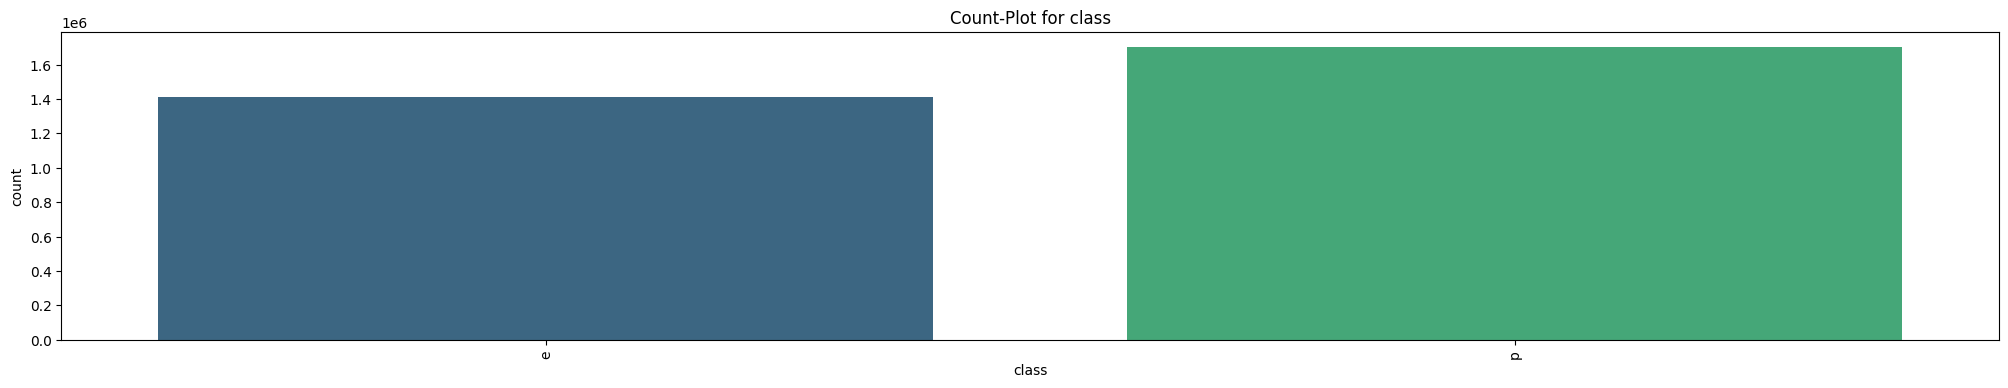

cap-shape


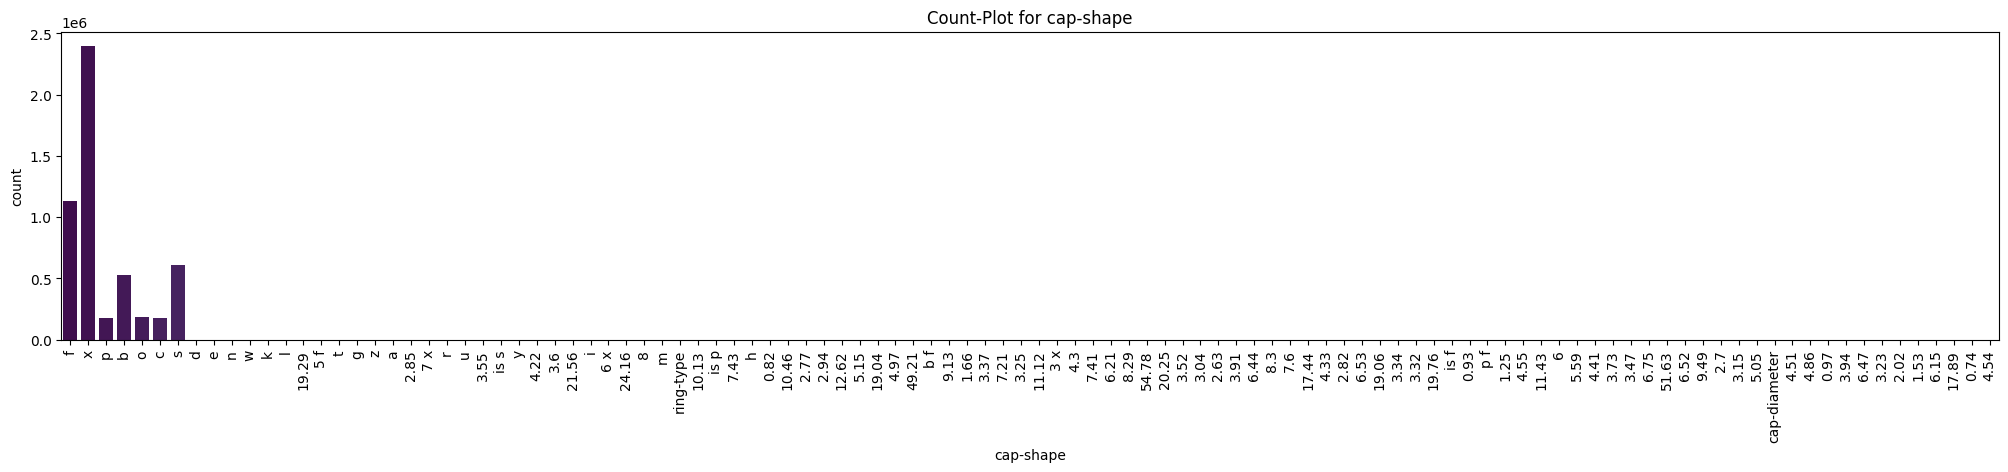

cap-surface


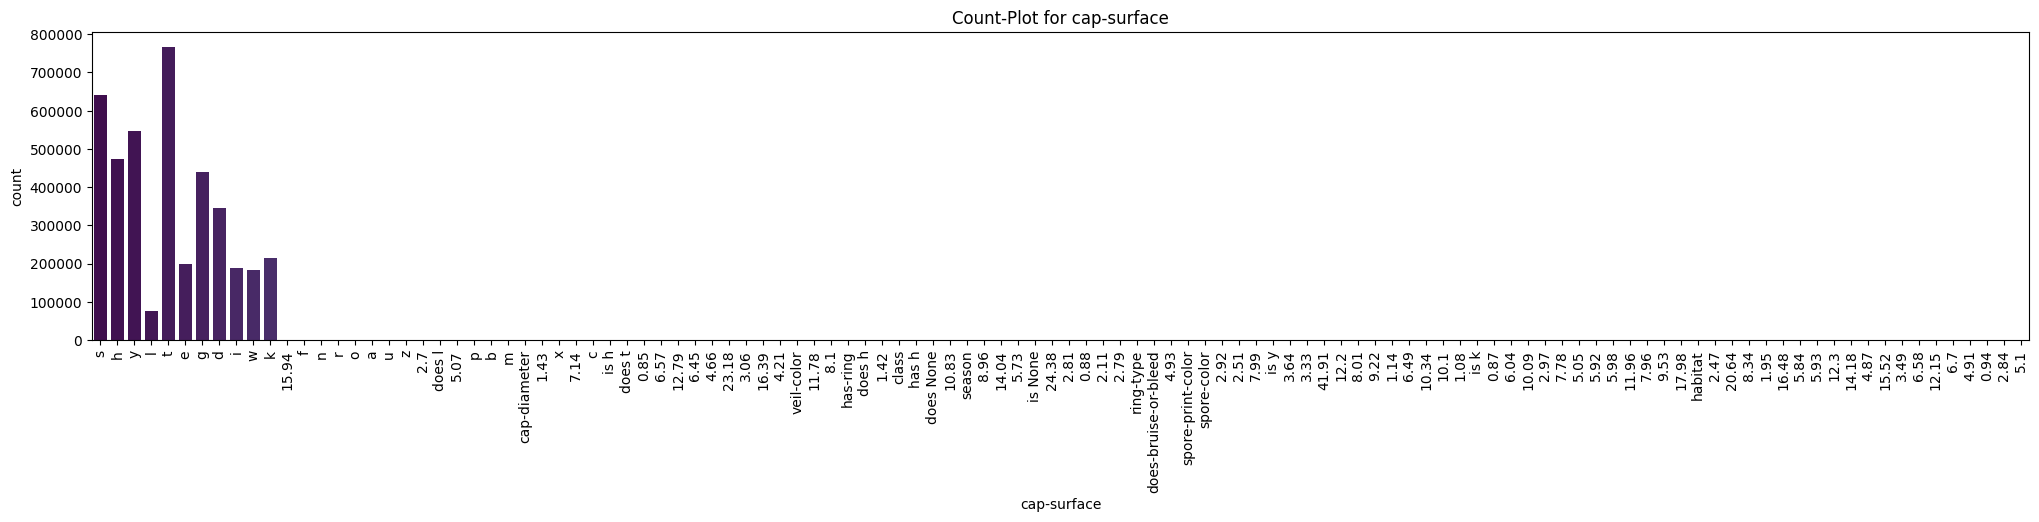

cap-color


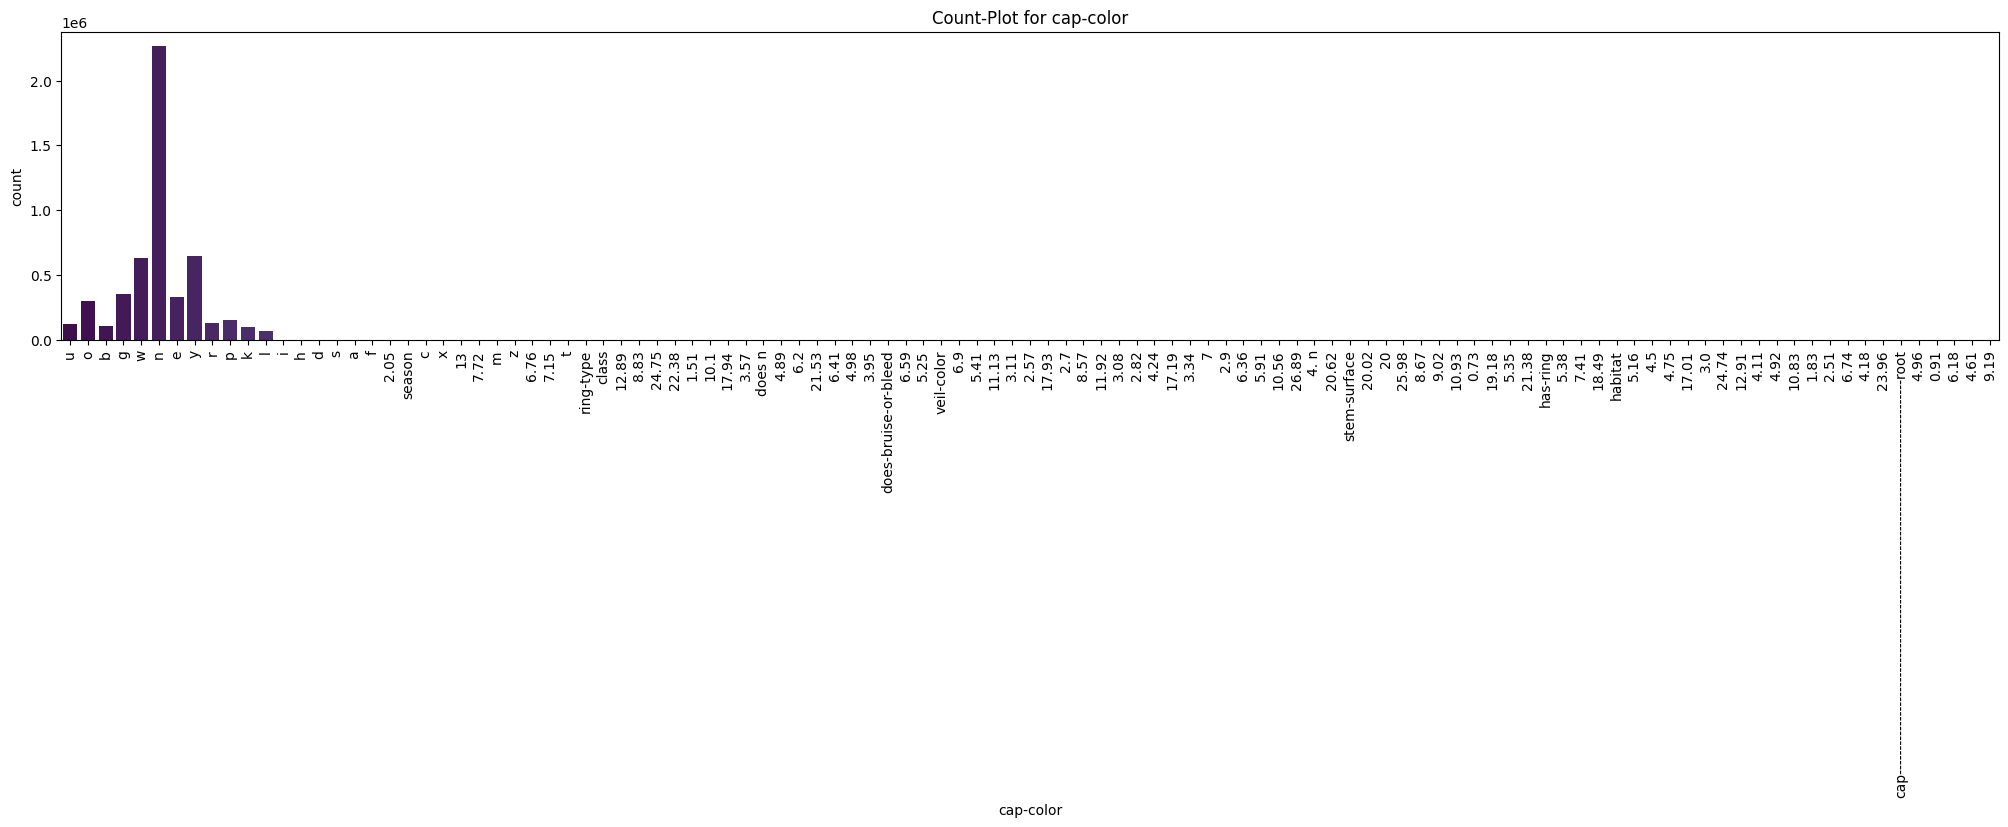

does-bruise-or-bleed


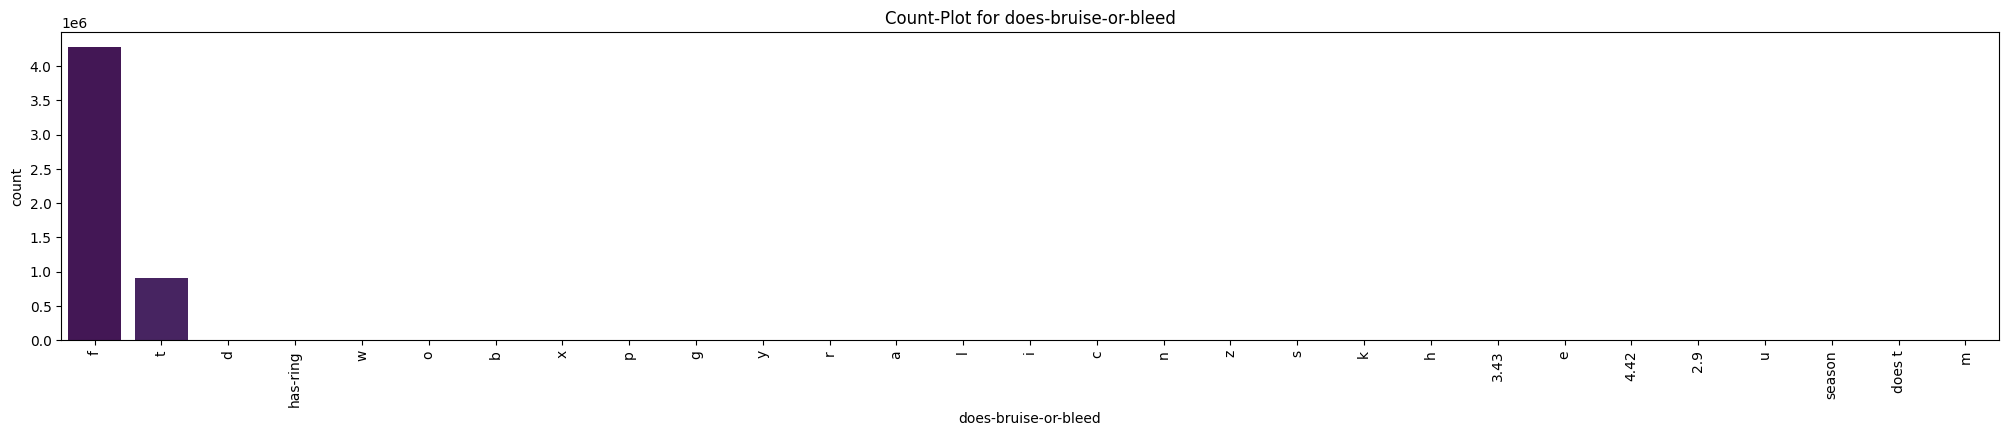

gill-attachment


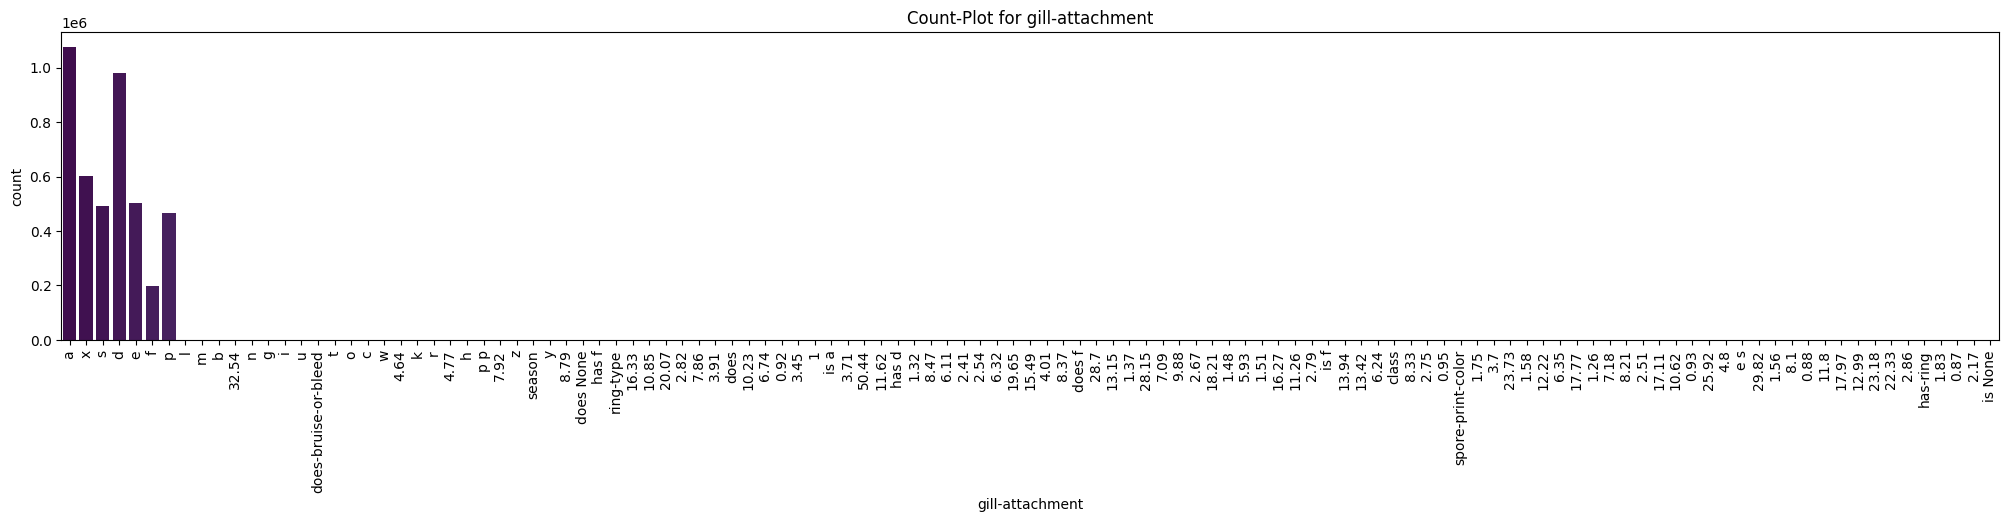

gill-spacing


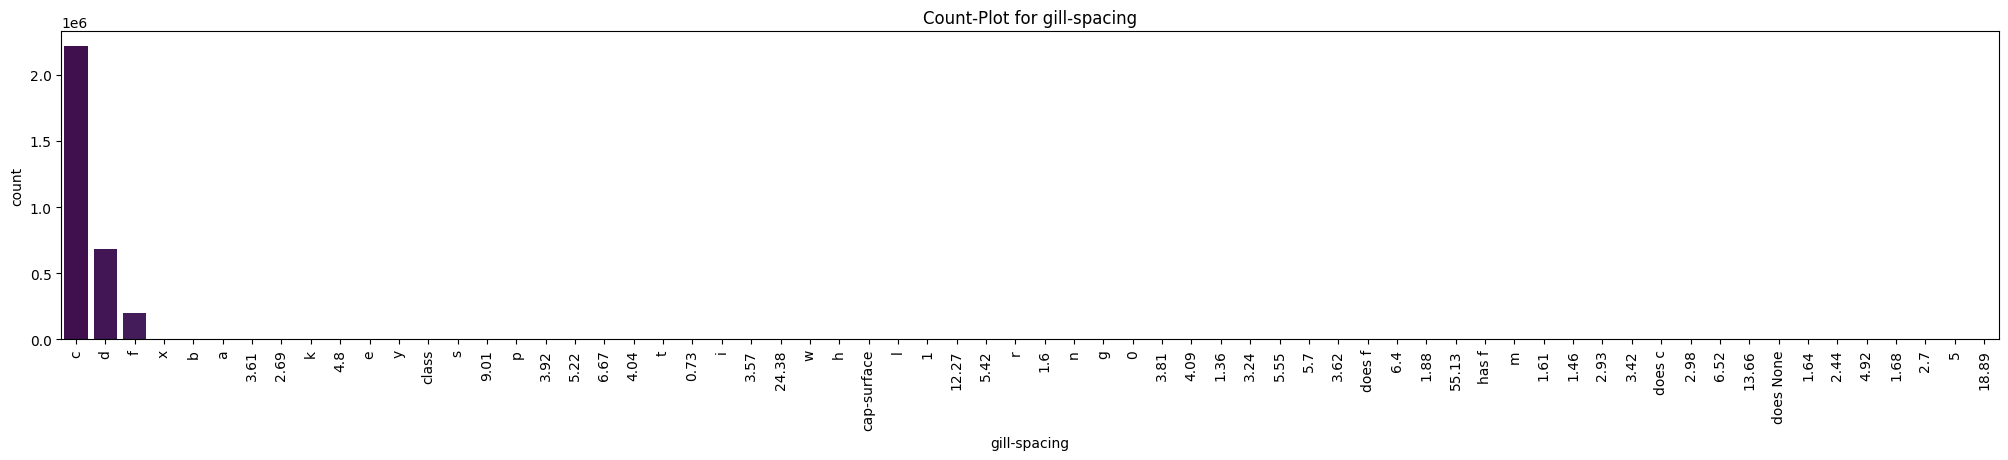

gill-color


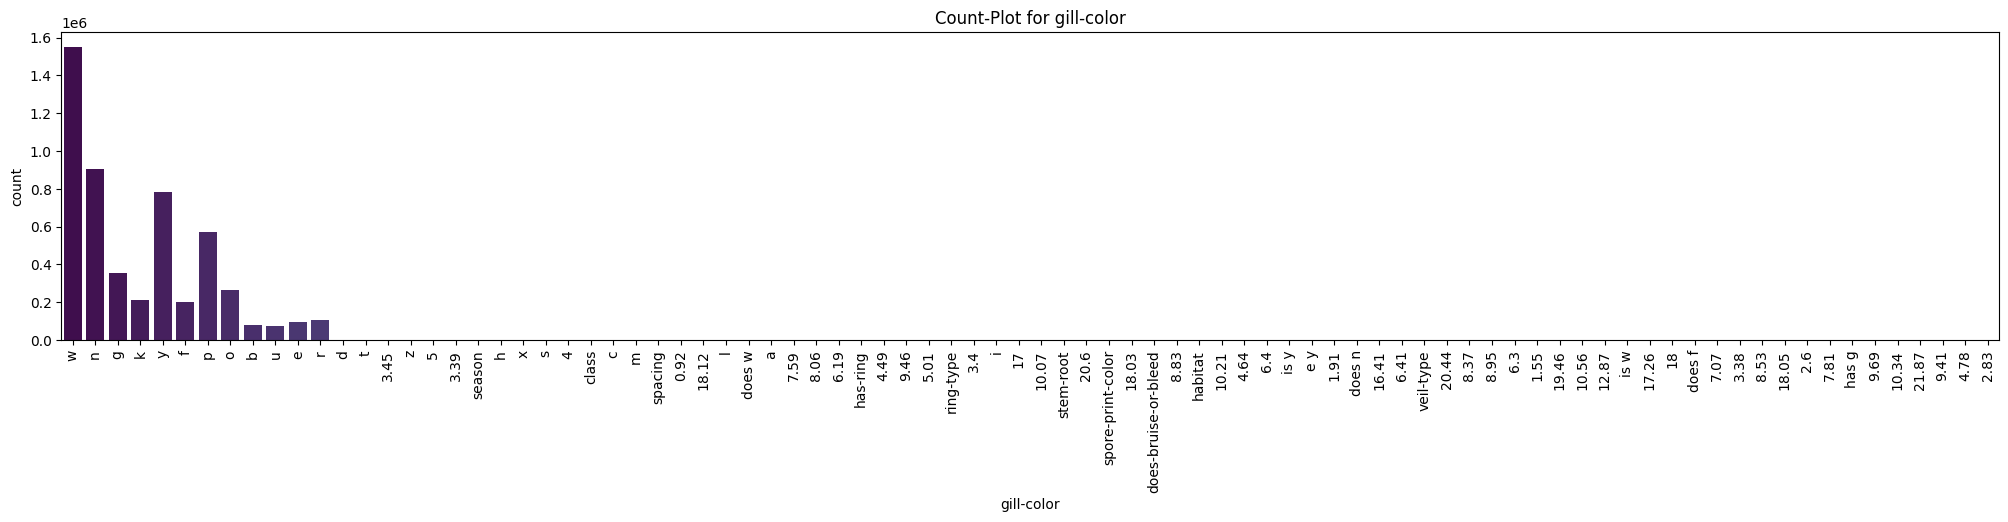

stem-surface


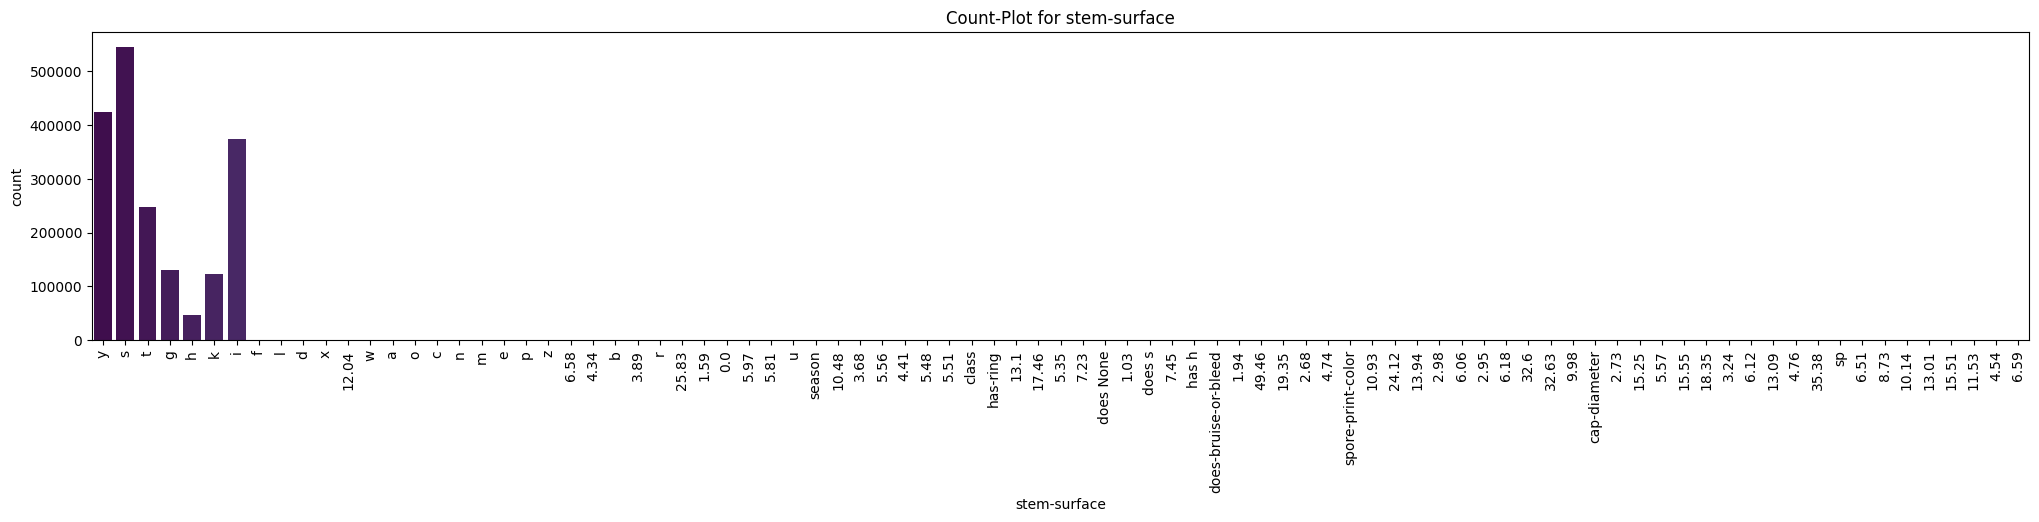

stem-color


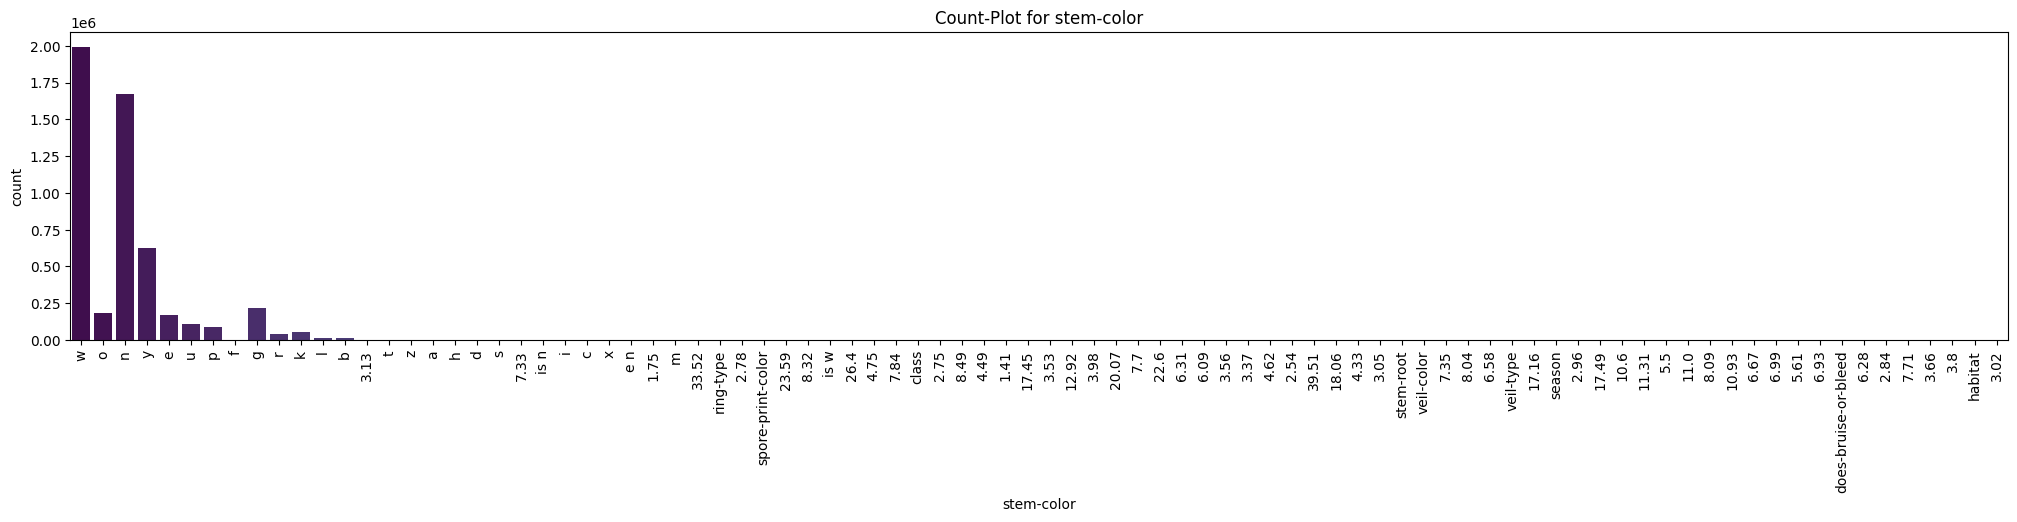

has-ring


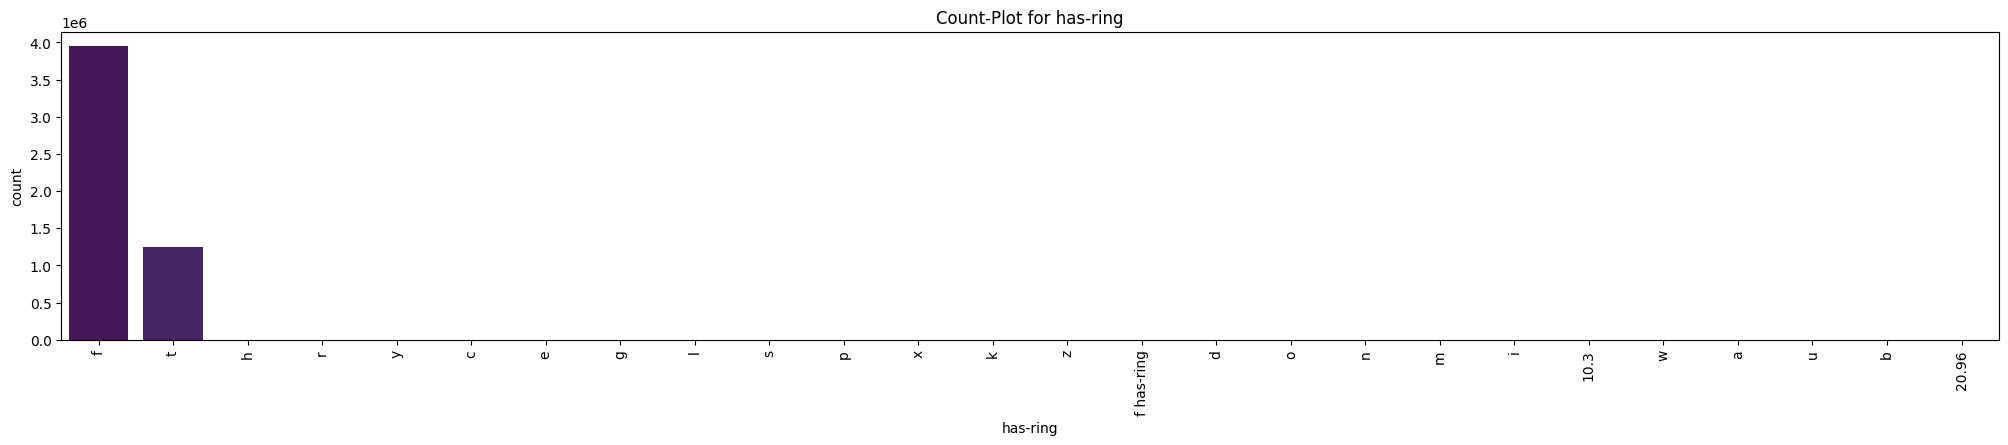

ring-type


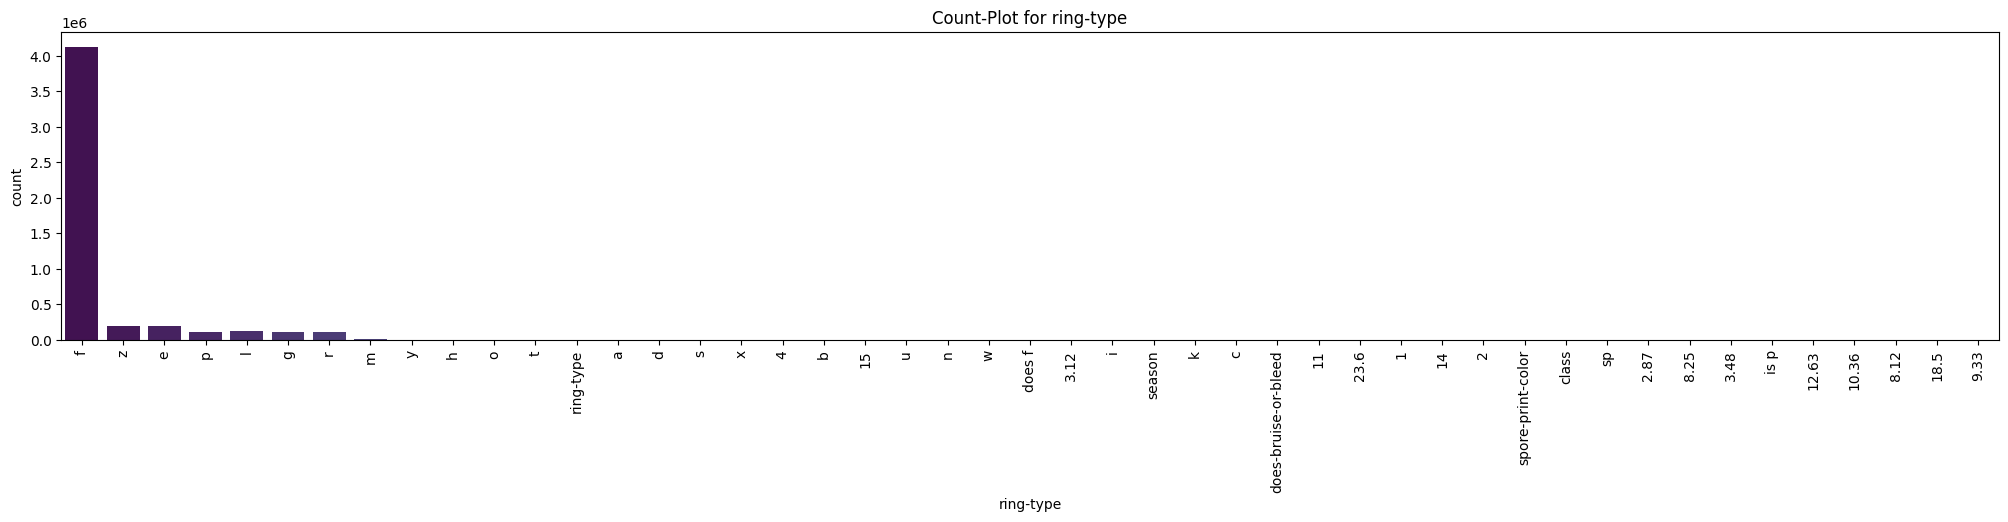

habitat


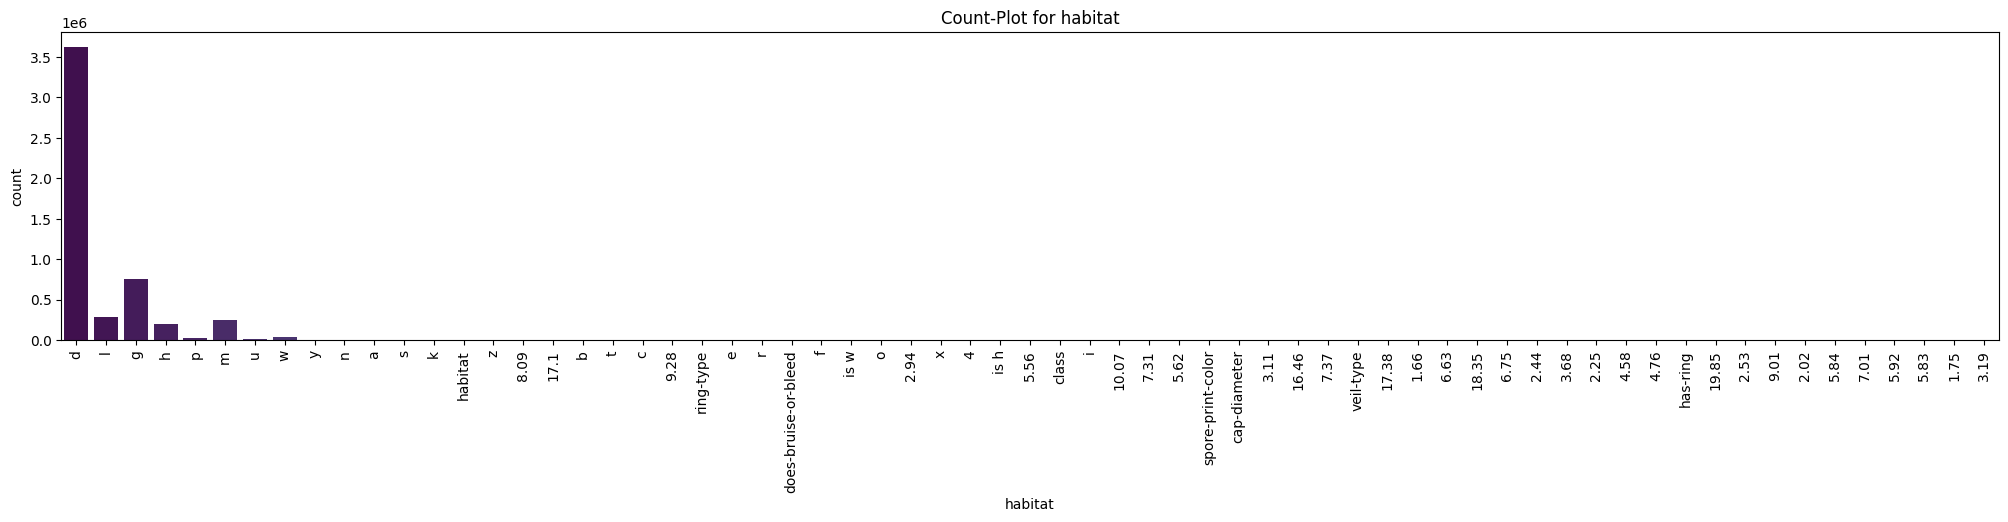

season


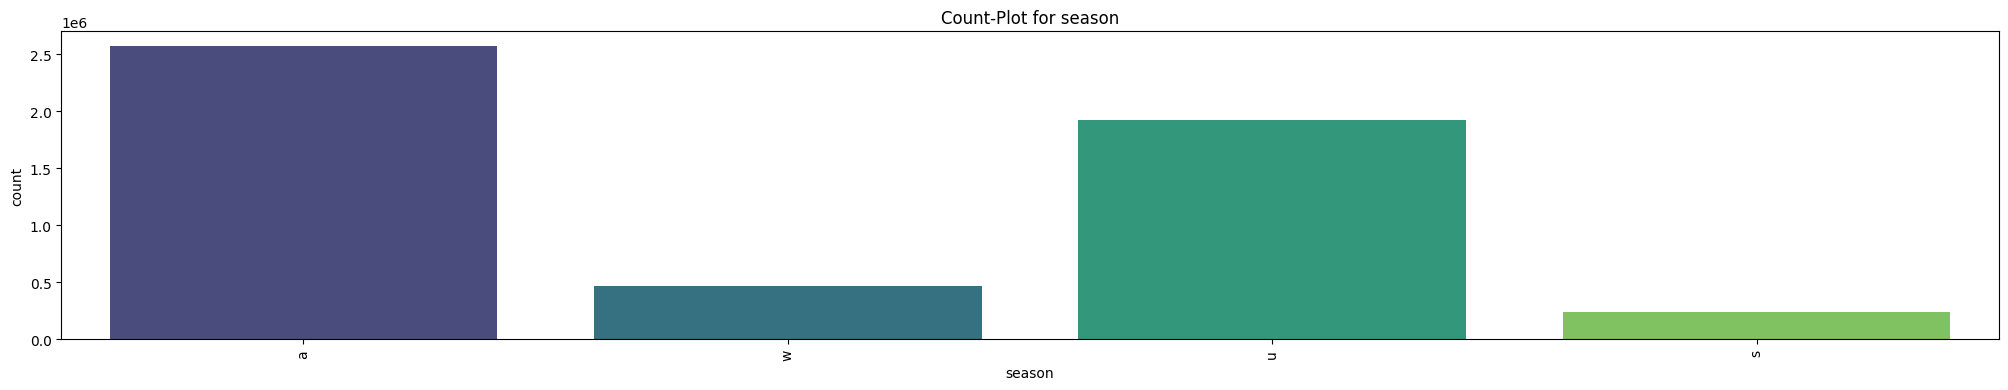

In [27]:
for column in com_data.select_dtypes(include = ['object']).columns:
    print(column)
    
  
    plt.figure(figsize = (25,4))
    sns.countplot(data = com_data, x = com_data[f'{column}'], palette = 'viridis')
    plt.xlabel(f'{column}')
    plt.xticks(rotation = 90)
    plt.title(f'Count-Plot for {column}')

    plt.show()

In [28]:
# Identify categorical columns (typically of type 'object' or 'category')
categorical_columns = com_data.select_dtypes(include=['object']).columns
print(len(categorical_columns))

# Create a dictionary to store unique values for each categorical column
unique_values = {}

for col in categorical_columns:
    unique_values[col] = com_data[col].unique()

# Print the results
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique Values: {values}")
    print()


14
Column: class
Unique Values: ['e' 'p' nan]

Column: cap-shape
Unique Values: ['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 'k' 'l' '19.29' '5 f' 't'
 'g' 'z' 'a' '2.85' '7 x' 'r' 'u' '3.55' 'is s' 'y' '4.22' '3.6' '21.56'
 'i' '6 x' '24.16' '8' 'm' 'ring-type' '10.13' 'is p' '7.43' 'h' '0.82'
 '10.46' '2.77' '2.94' '12.62' '5.15' '19.04' '4.97' '49.21' 'b f' '9.13'
 '1.66' '3.37' '7.21' '3.25' '11.12' '3 x' '4.3' '7.41' '6.21' '8.29'
 '54.78' '20.25' '3.52' '3.04' '2.63' '3.91' '6.44' '8.3' '7.6' '17.44'
 '4.33' '2.82' '6.53' '19.06' '3.34' '3.32' '19.76' 'is f' '0.93' 'p f'
 '1.25' '4.55' '11.43' '6' '5.59' '4.41' '3.73' '3.47' '6.75' '51.63'
 '6.52' '9.49' '2.7' '3.15' '5.05' 'cap-diameter' '4.51' '4.86' '0.97'
 '3.94' '6.47' '3.23' '2.02' '1.53' '6.15' '17.89' '0.74' '4.54']

Column: cap-surface
Unique Values: ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' '15.94' 'f' 'n' 'r' 'o'
 'a' 'u' 'z' '2.7' 'does l' '5.07' 'p' 'b' 'm' 'cap-diameter' '1.43' 'x'
 '7.14' 'c' 'is h' 'doe

### **Handling missing values of Numerical/Quantitative  Features**

In [29]:
# Fill missing values in all columns with the respective column medians
num_features_cols = com_data.select_dtypes(include = ['float64']).columns

for column in num_features_cols:
    
    com_data[column].fillna(com_data[column].median(), inplace = True)

    
### or 
# from sklearn.impute import SimpleImputer

# # Creating an imputer object to replace missing values with the median
# imputer = SimpleImputer(strategy='median')

# # Apply imputer to a single column
# df[columns_names] = imputer.fit_transform(df[[columns_names]])
# print("\nDataFrame after imputing missing values in column 'columns_names':")
# print(df)

In [30]:
com_data.isna().sum()

id                            0
class                   2077964
cap-diameter                  0
cap-shape                    71
cap-surface             1117927
cap-color                    25
does-bruise-or-bleed         18
gill-attachment          873757
gill-spacing            2098030
gill-color                  106
stem-height                   0
stem-width                    0
stem-surface            3302349
stem-color                   59
has-ring                     43
ring-type                215075
habitat                      70
season                        0
dtype: int64

### **Handling missing values And Removing Noise for the Categorical Features**

#### Removing Noise 

In [31]:

# Function to remove noise
def remove_noise(df, noise_th=200):
    
    cat_feats = df.select_dtypes(include=['O']).columns

    for feat in cat_feats:
        # Calculate the value counts for the feature
        value_counts = df[feat].value_counts()
        
        # Identify categories that are considered noise
        noise_categories = value_counts[value_counts < noise_th].index
        
        # Replace noise categories with 'noise'
        df[feat] = df[feat].replace(noise_categories, 'noise')

#     # Optionally, remove rows where any feature has the value 'noise'
#     df_cleaned = df[~df.isin(['noise']).any(axis=1)]

    return df

cleaned_com_data = remove_noise(com_data)
cleaned_com_data.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,w,f,f,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,y,o,t,z,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,s,n,f,f,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,w,f,f,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,w,f,f,g,a


class


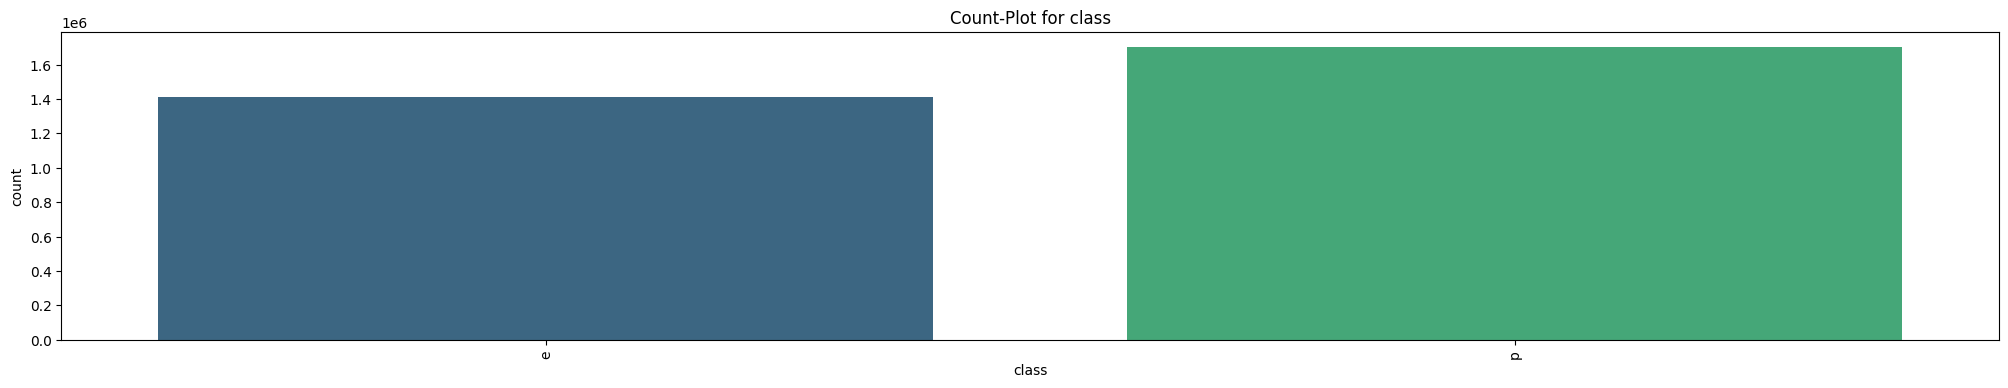

cap-shape


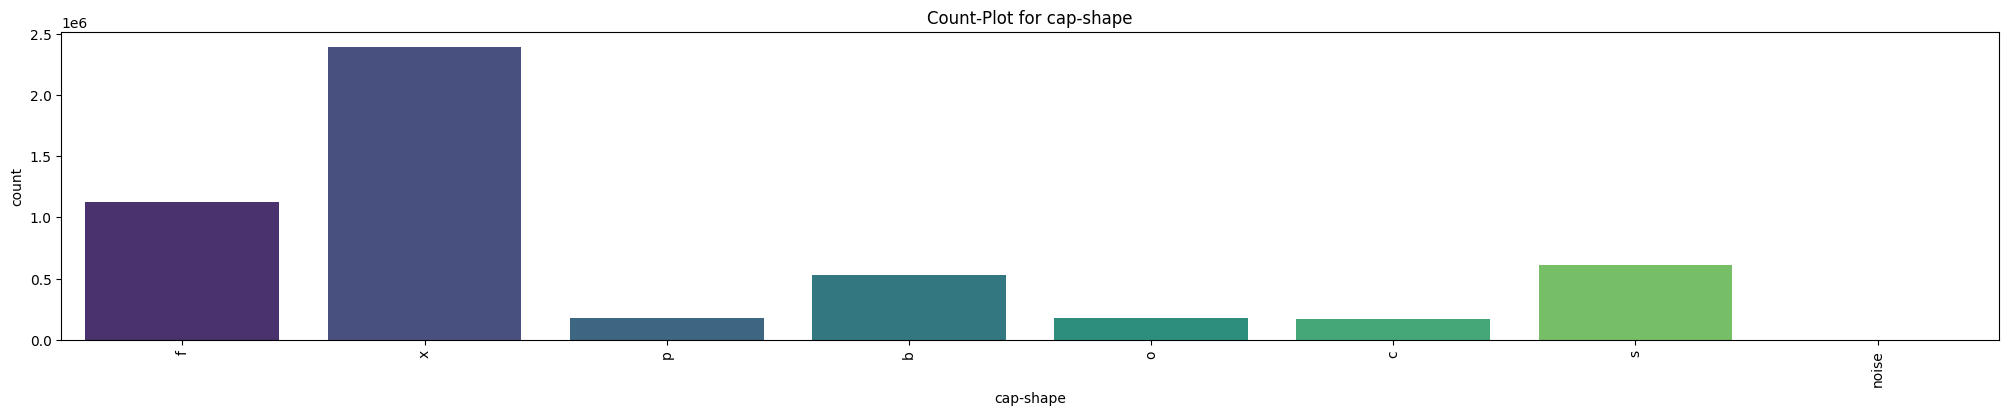

cap-surface


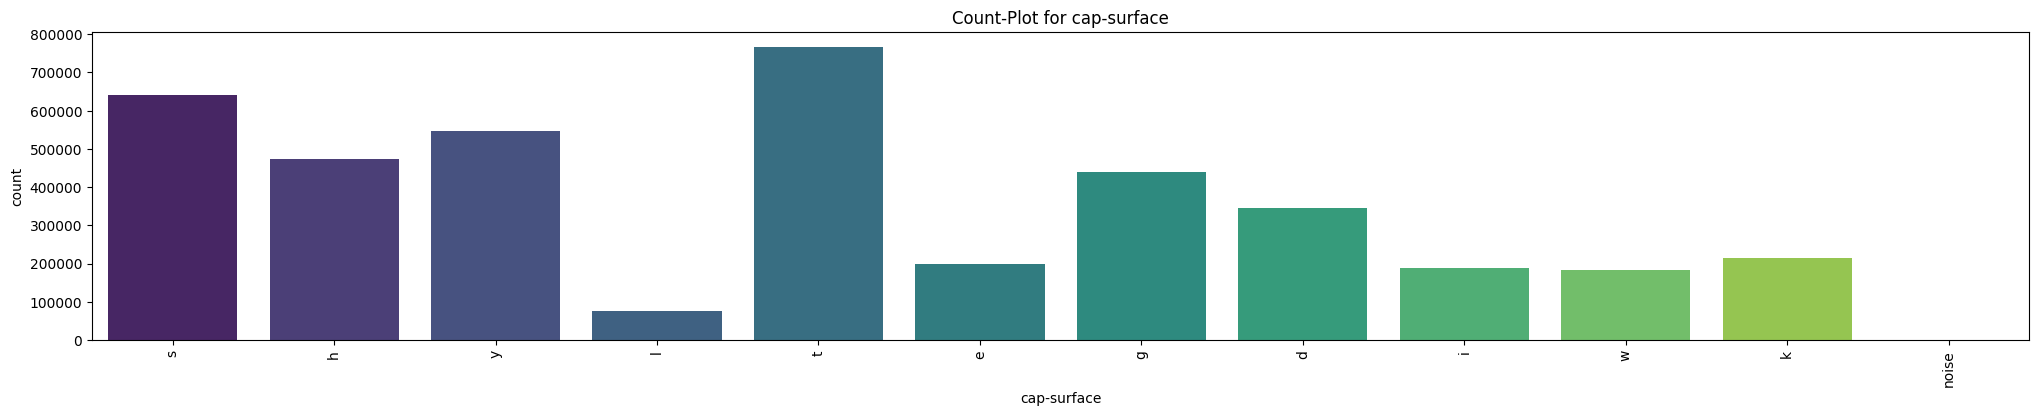

cap-color


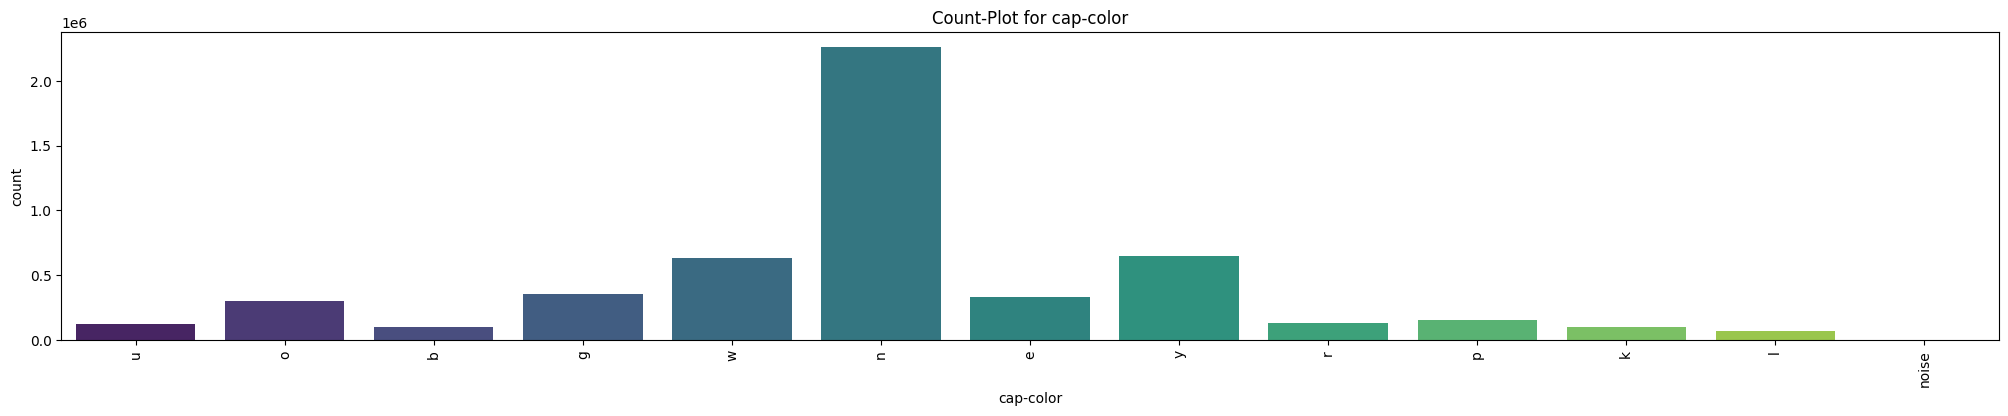

does-bruise-or-bleed


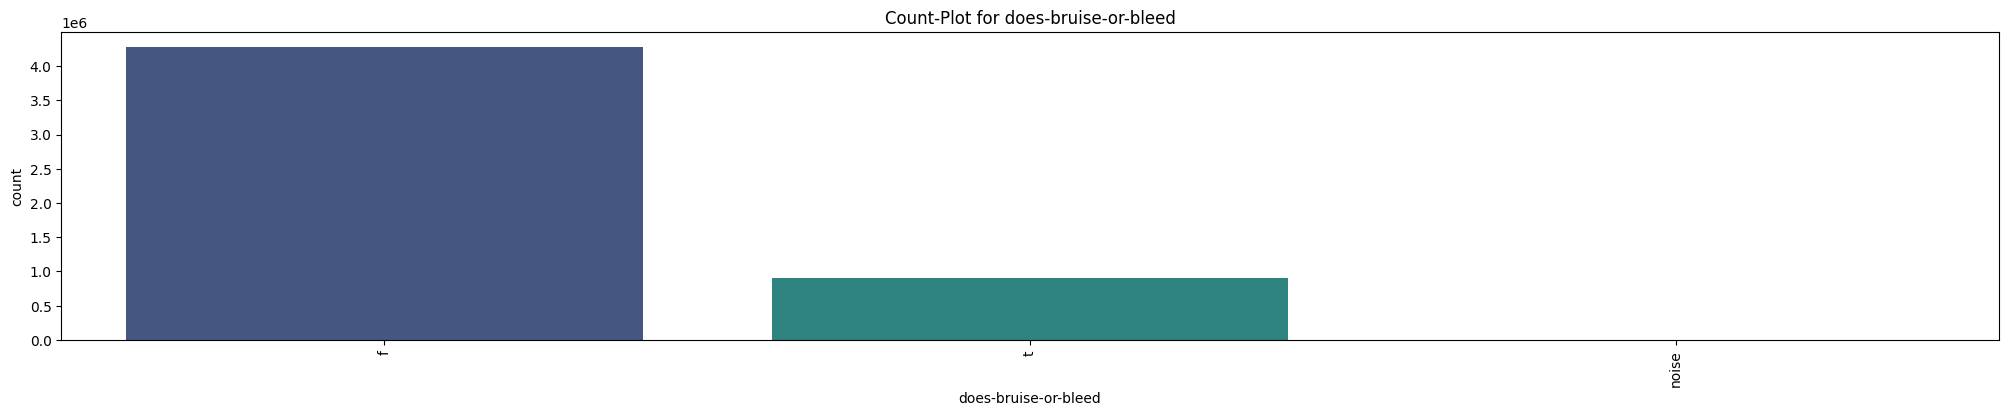

gill-attachment


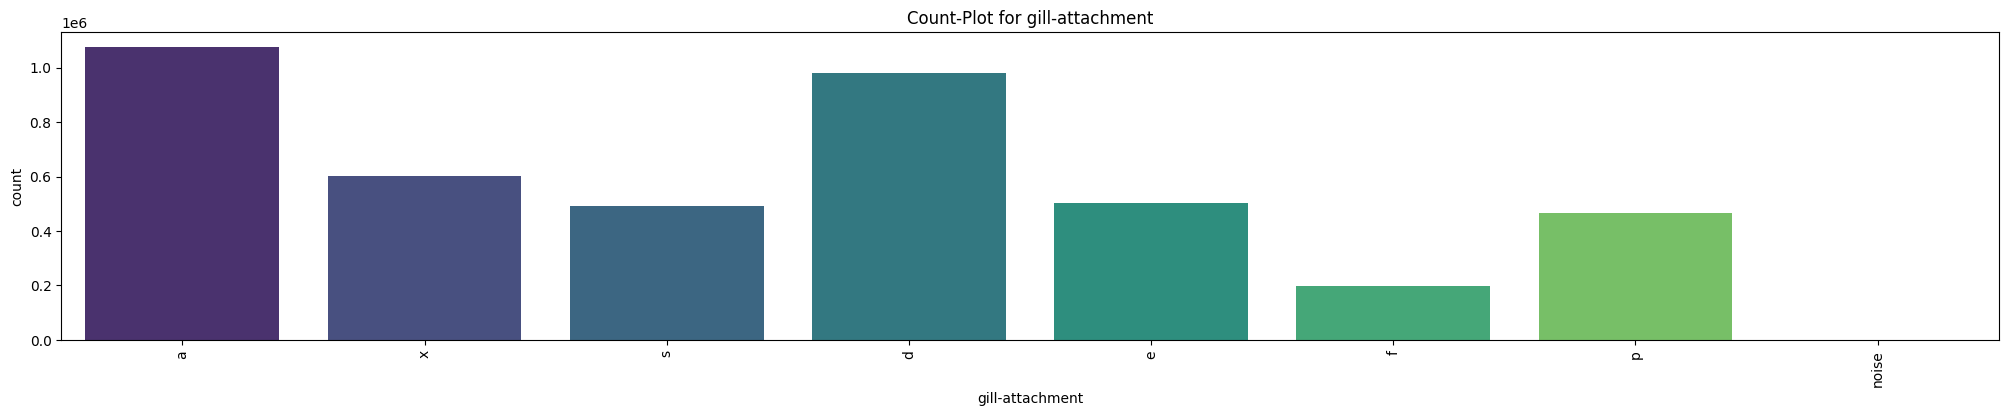

gill-spacing


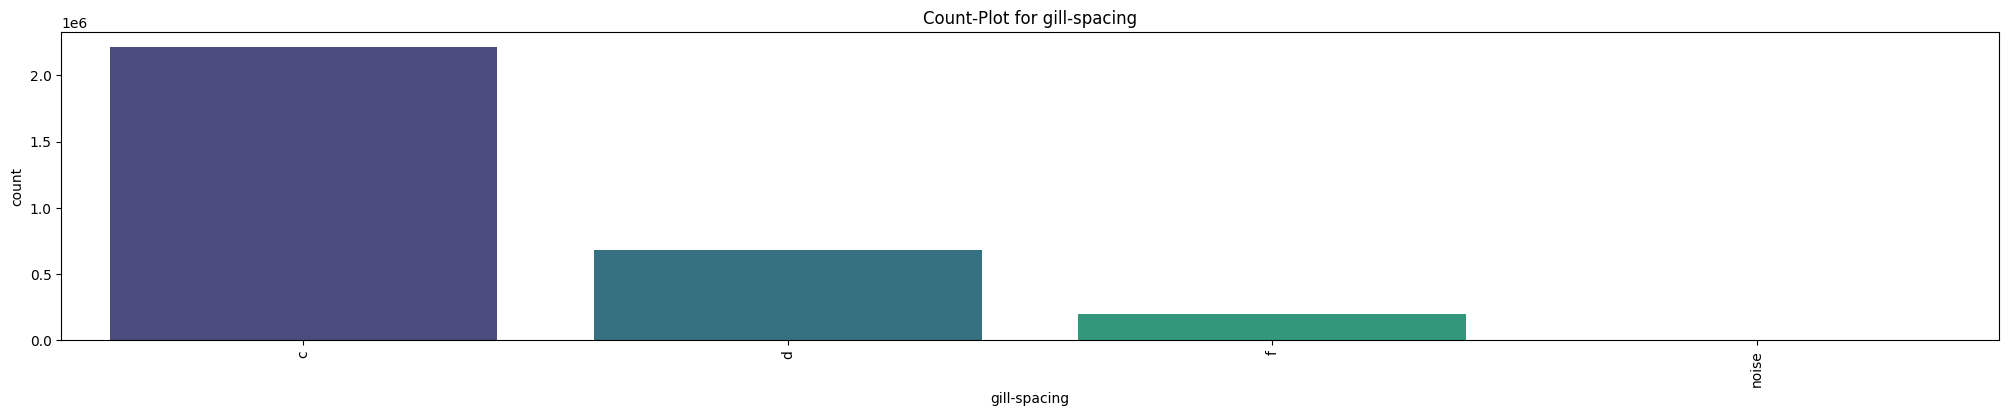

gill-color


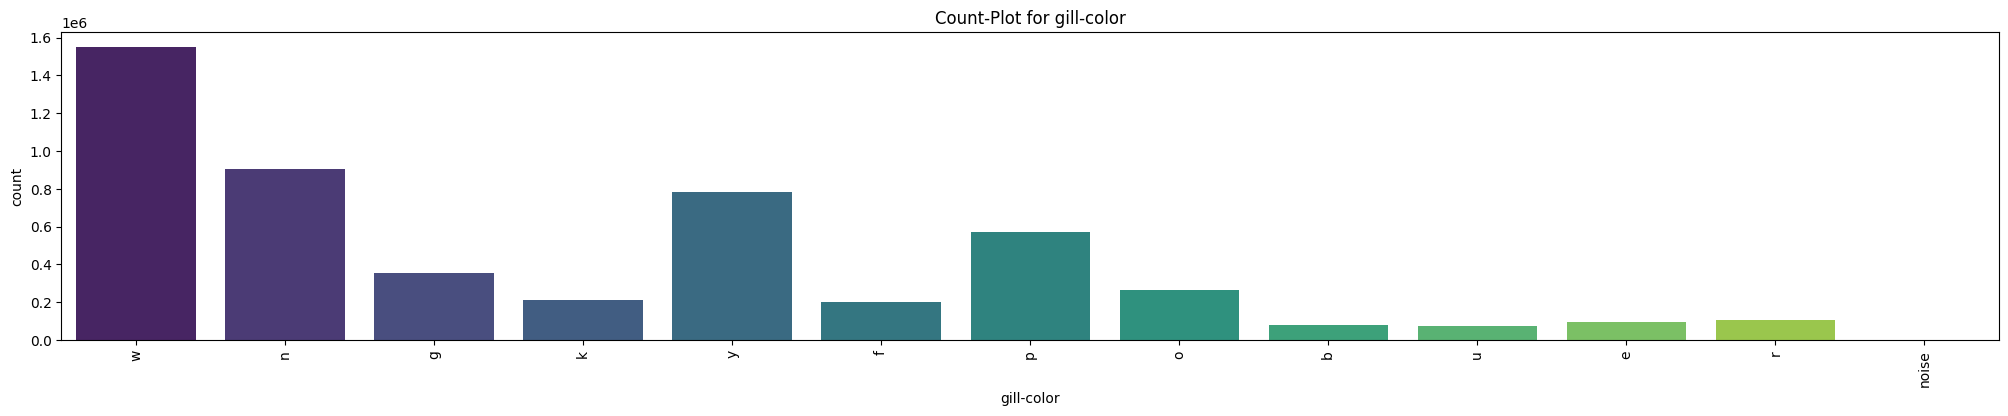

stem-surface


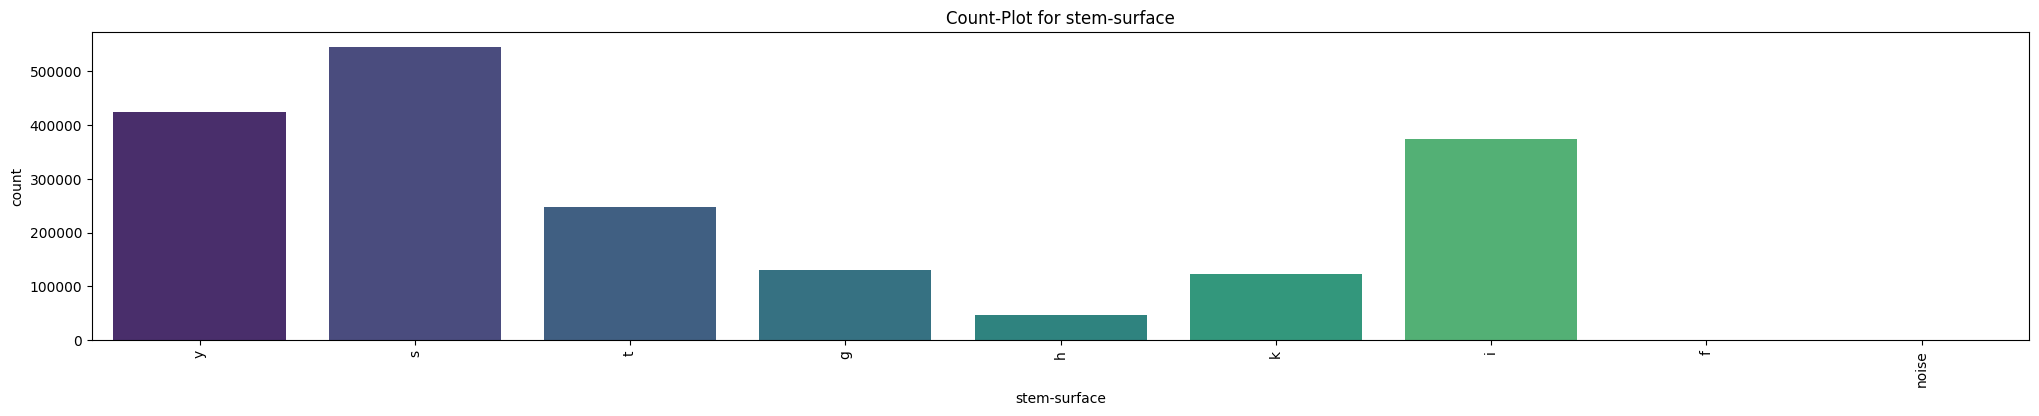

stem-color


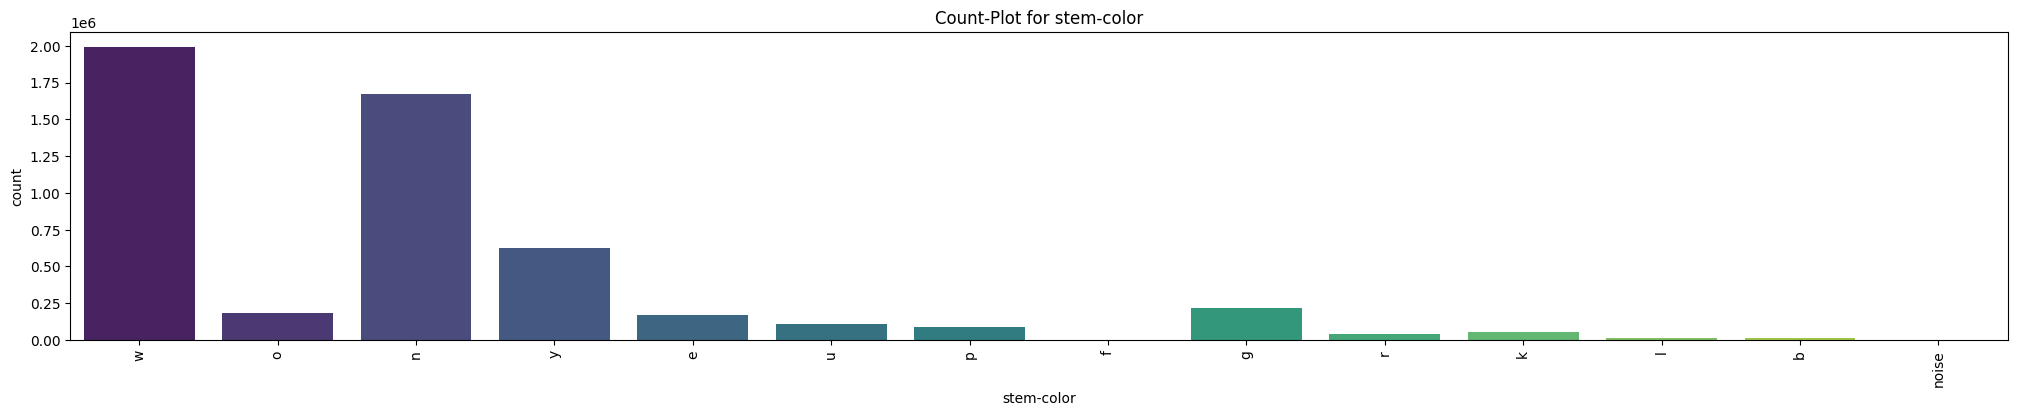

has-ring


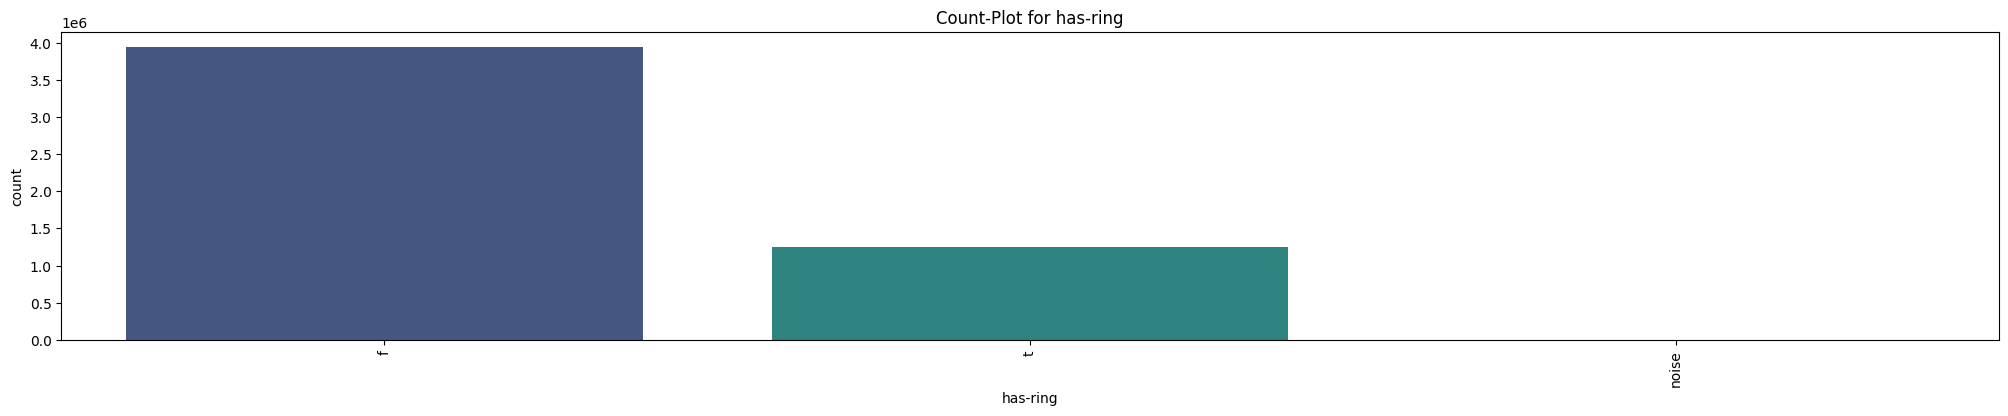

ring-type


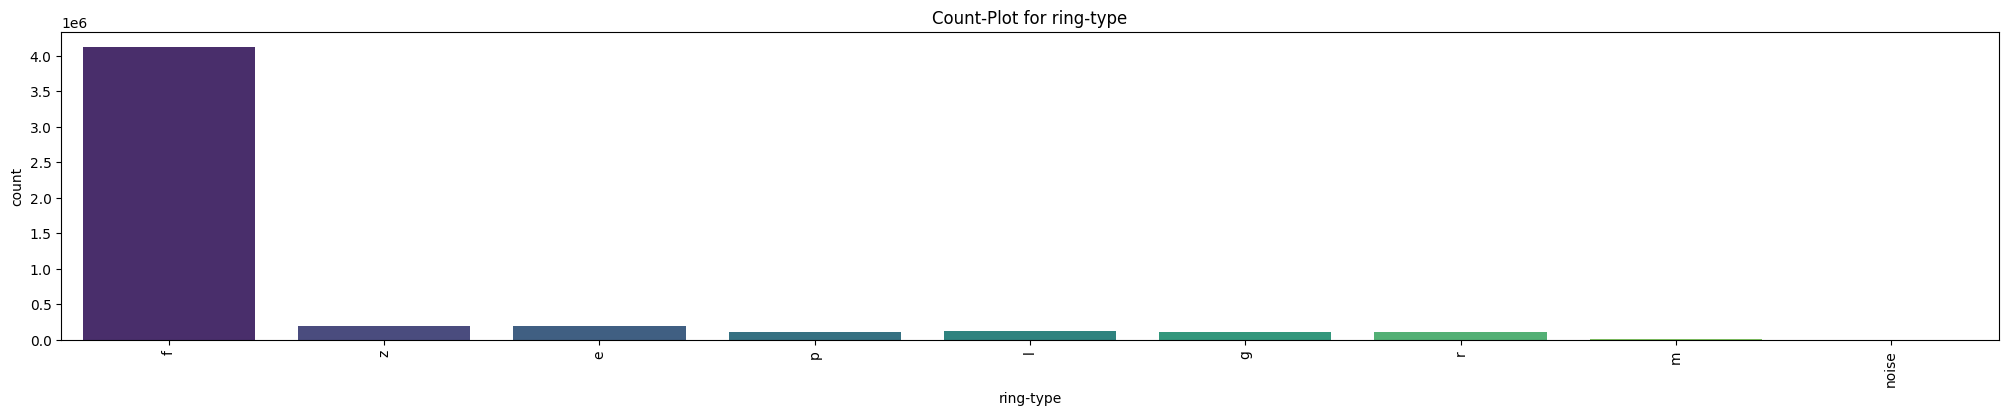

habitat


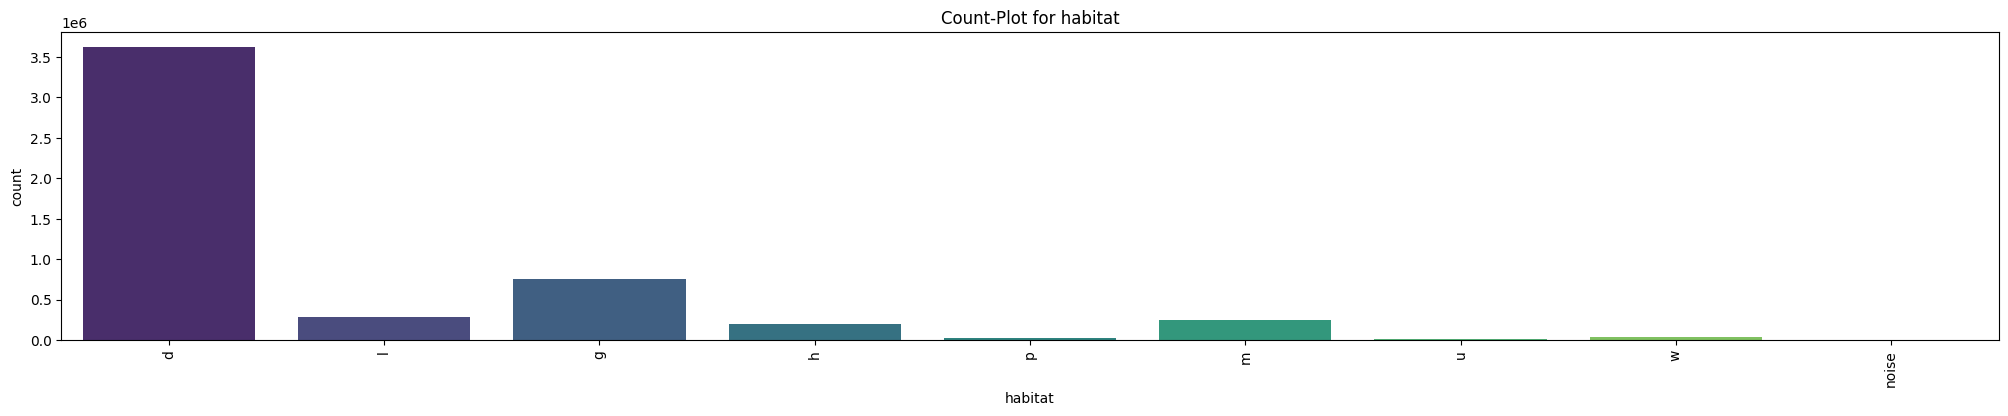

season


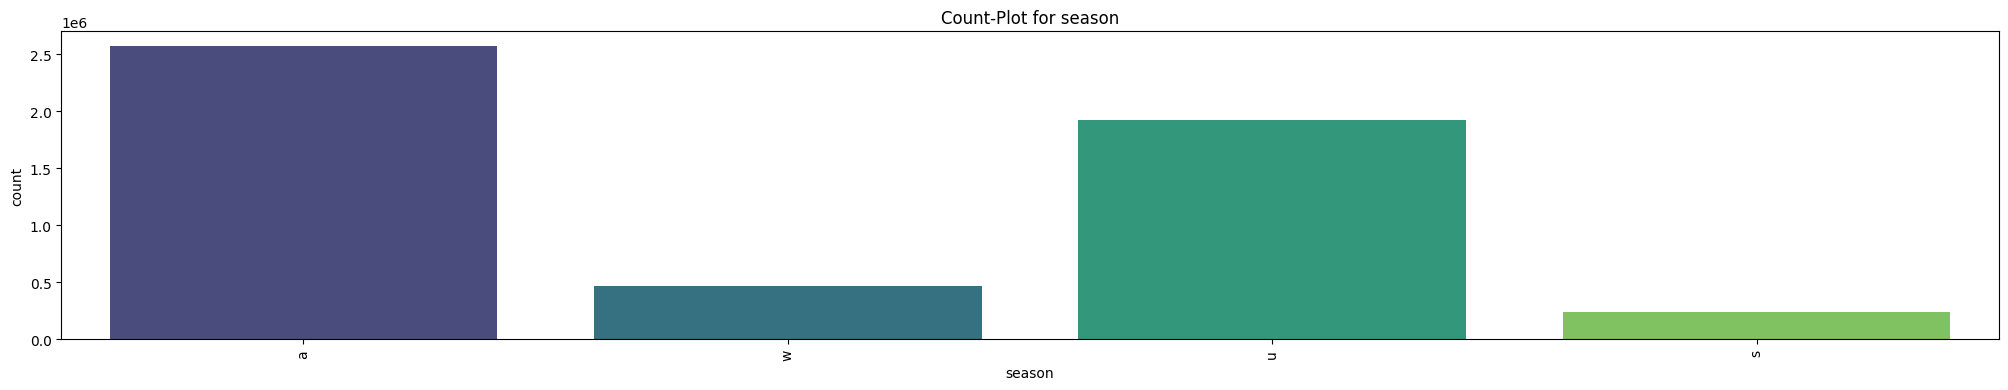

In [32]:
for column in com_data.select_dtypes(include = ['object']).columns:
    print(column)
    
  
    plt.figure(figsize = (25,4))
    sns.countplot(data = com_data, x = com_data[f'{column}'], palette = 'viridis')
    plt.xlabel(f'{column}')
    plt.xticks(rotation = 90)
    plt.title(f'Count-Plot for {column}')

    plt.show()

In [33]:
# Identify categorical columns (typically of type 'object' or 'category')
categorical_columns = com_data.select_dtypes(include=['object']).columns
print(len(categorical_columns))

# Create a dictionary to store unique values for each categorical column
unique_values = {}

for col in categorical_columns:
    unique_values[col] = com_data[col].unique()

# Print the results
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(f"Unique Values: {values}")
    print()

14
Column: class
Unique Values: ['e' 'p' nan]

Column: cap-shape
Unique Values: ['f' 'x' 'p' 'b' 'o' 'c' 's' 'noise' nan]

Column: cap-surface
Unique Values: ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' 'noise']

Column: cap-color
Unique Values: ['u' 'o' 'b' 'g' 'w' 'n' 'e' 'y' 'r' 'p' 'k' 'l' 'noise' nan]

Column: does-bruise-or-bleed
Unique Values: ['f' 't' 'noise' nan]

Column: gill-attachment
Unique Values: ['a' 'x' 's' 'd' 'e' nan 'f' 'p' 'noise']

Column: gill-spacing
Unique Values: ['c' nan 'd' 'f' 'noise']

Column: gill-color
Unique Values: ['w' 'n' 'g' 'k' 'y' 'f' 'p' 'o' 'b' 'u' 'e' 'r' 'noise' nan]

Column: stem-surface
Unique Values: [nan 'y' 's' 't' 'g' 'h' 'k' 'i' 'f' 'noise']

Column: stem-color
Unique Values: ['w' 'o' 'n' 'y' 'e' 'u' 'p' 'f' 'g' 'r' 'k' 'l' 'b' 'noise' nan]

Column: has-ring
Unique Values: ['f' 't' 'noise' nan]

Column: ring-type
Unique Values: ['f' 'z' 'e' nan 'p' 'l' 'g' 'r' 'm' 'noise']

Column: habitat
Unique Values: ['d' 'l' 'g' 'h' 'p' 'm' 'u'

In [34]:
com_data.isna().sum()

id                            0
class                   2077964
cap-diameter                  0
cap-shape                    71
cap-surface             1117927
cap-color                    25
does-bruise-or-bleed         18
gill-attachment          873757
gill-spacing            2098030
gill-color                  106
stem-height                   0
stem-width                    0
stem-surface            3302349
stem-color                   59
has-ring                     43
ring-type                215075
habitat                      70
season                        0
dtype: int64

#### Filling Missing Values

In [35]:
# from sklearn.impute import KNNImputer

# # Identify numeric columns
# cat_features = com_data.select_dtypes(include=['float64']).columns    

# # Initialize the KNNImputer
# imputer = KNNImputer(n_neighbors=5)

# com_data[cat_features] = imputer.fit_transform(com_data[cat_features])



In [36]:
from sklearn.impute import SimpleImputer

cat_features = com_data.select_dtypes(include = ['O']).columns

# for column in cat_features:
    
#     com_data[column].fillna(com_data[column].mode(), inplace = True)


# Creating an imputer object to replace missing values with the median
imputer = SimpleImputer(strategy = 'most_frequent' )

# Apply imputer to a single column
com_data[cat_features] = imputer.fit_transform(com_data[cat_features])


In [37]:
com_data.to_csv('com_data_wo_encoded_cat_features_removed_noise.csv')

#### Encoding Categorical Features 

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from category_encoders import OrdinalEncoder

In [39]:
# cat_features = com_data.select_dtypes(include=['O']).columns

# # Label Encoding
# label_encoder = LabelEncoder()
# for feat in cat_features:
#     com_data[feat] = label_encoder.fit_transform(com_data[feat])

In [40]:
# com_data.head(10)

In [41]:
# cat_features = com_data.select_dtypes(include=['O']).columns
# # One-Hot Encoding
# com_data_encoded = pd.get_dummies(com_data, columns=cat_features)

In [42]:
# Ordinal Encoding
cat_features = com_data.select_dtypes(include=['O']).columns

ordinal_encoder = OrdinalEncoder()
com_data[cat_features] = ordinal_encoder.fit_transform(com_data[cat_features])

In [43]:
com_data.isna().sum()

id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [44]:
com_data.to_csv('com_data_with_encoded_cat_features_removed_noise_with_outliers.csv')

In [45]:
com_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5194909 entries, 0 to 5194908
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 int64  
 2   cap-diameter          float64
 3   cap-shape             int64  
 4   cap-surface           int64  
 5   cap-color             int64  
 6   does-bruise-or-bleed  int64  
 7   gill-attachment       int64  
 8   gill-spacing          int64  
 9   gill-color            int64  
 10  stem-height           float64
 11  stem-width            float64
 12  stem-surface          int64  
 13  stem-color            int64  
 14  has-ring              int64  
 15  ring-type             int64  
 16  habitat               int64  
 17  season                int64  
dtypes: float64(3), int64(15)
memory usage: 713.4 MB


### Removing Outliers

cap-diameter


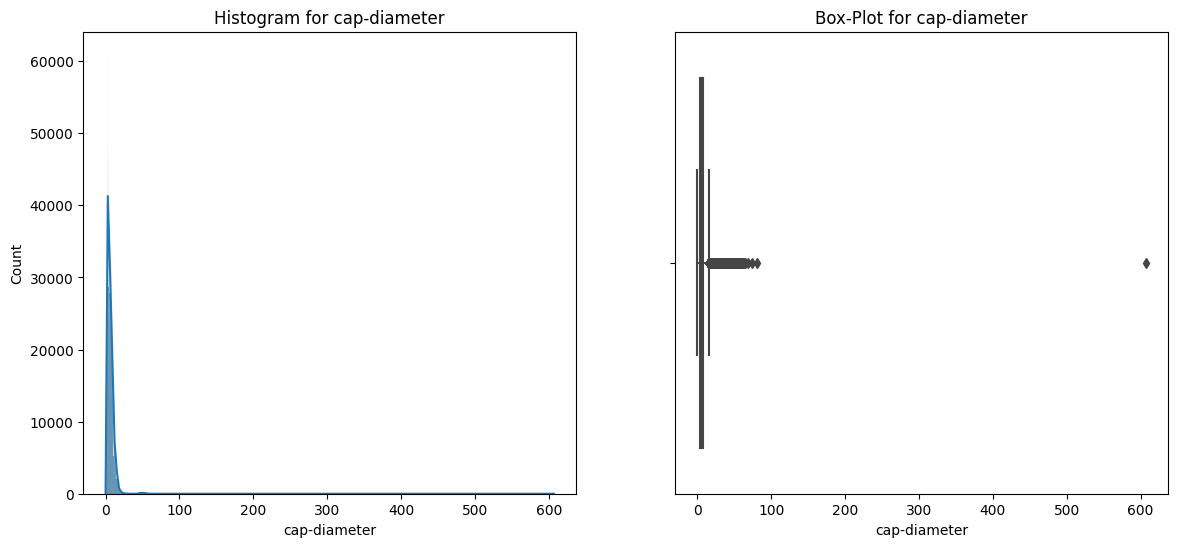

stem-height


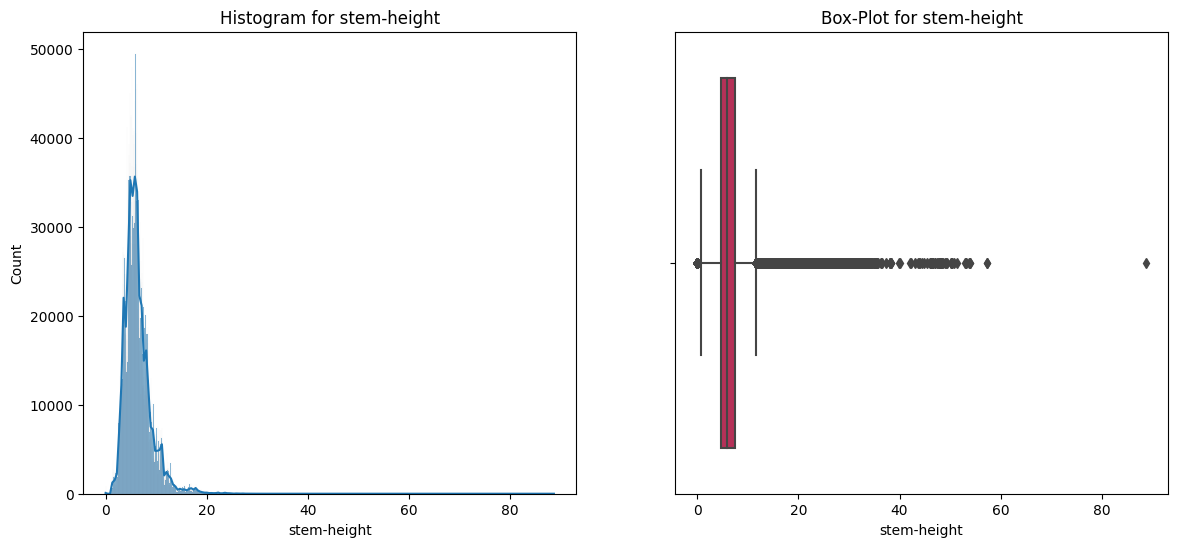

stem-width


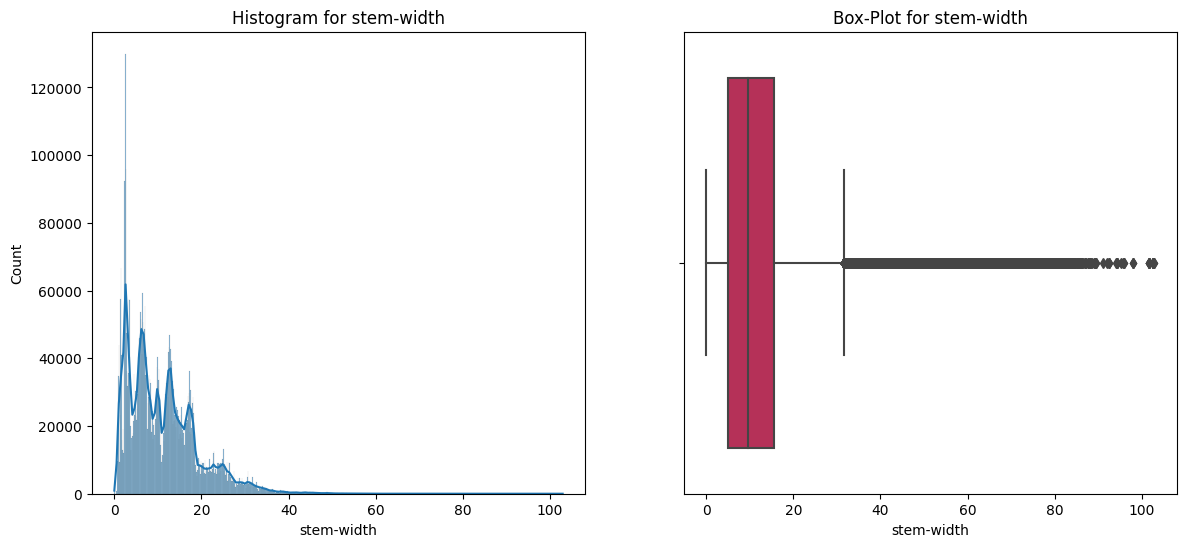

In [46]:
for column in com_data.select_dtypes(include = ['float64']).columns:
    print(column)
    
    plt.figure(figsize=(14,6))
    plt.tight_layout()
    
    plt.subplot(1,2,1)
    sns.histplot(data = com_data[f'{column}'],kde = True, palette = 'viridis')
    plt.xlabel(f'{column}')
    plt.axis()
    plt.title(f'Histogram for {column}')
    
    plt.subplot(1,2,2)
    sns.boxplot(data = com_data,x=com_data[f'{column}'],width = 0.8,palette = 'rocket',color = 'red')
    plt.xlabel(f'{column}')
    plt.title(f'Box-Plot for {column}')
    
    plt.show()

In [47]:
from scipy.stats import skew
from sklearn.preprocessing import QuantileTransformer

In [48]:
col = ['cap-diameter', 'stem-height', 'stem-width']

com_data[col].apply(skew)



cap-diameter    4.370664
stem-height     1.924790
stem-width      1.240997
dtype: float64

In [49]:
# Initialize the QuantileTransformer
qt = QuantileTransformer(output_distribution='normal', random_state=0,)

# Fit and transform the data
com_data[col] = qt.fit_transform(com_data[col])


In [50]:
col = ['cap-diameter', 'stem-height', 'stem-width']

com_data[col].apply(skew)


cap-diameter    0.004604
stem-height     0.012651
stem-width      0.000644
dtype: float64

cap-diameter


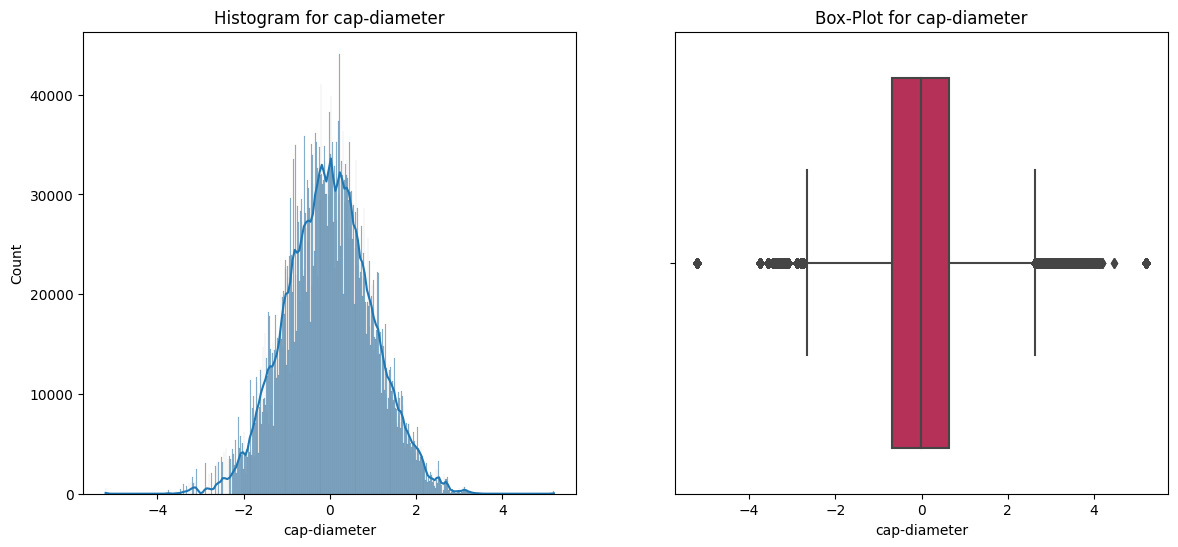

stem-height


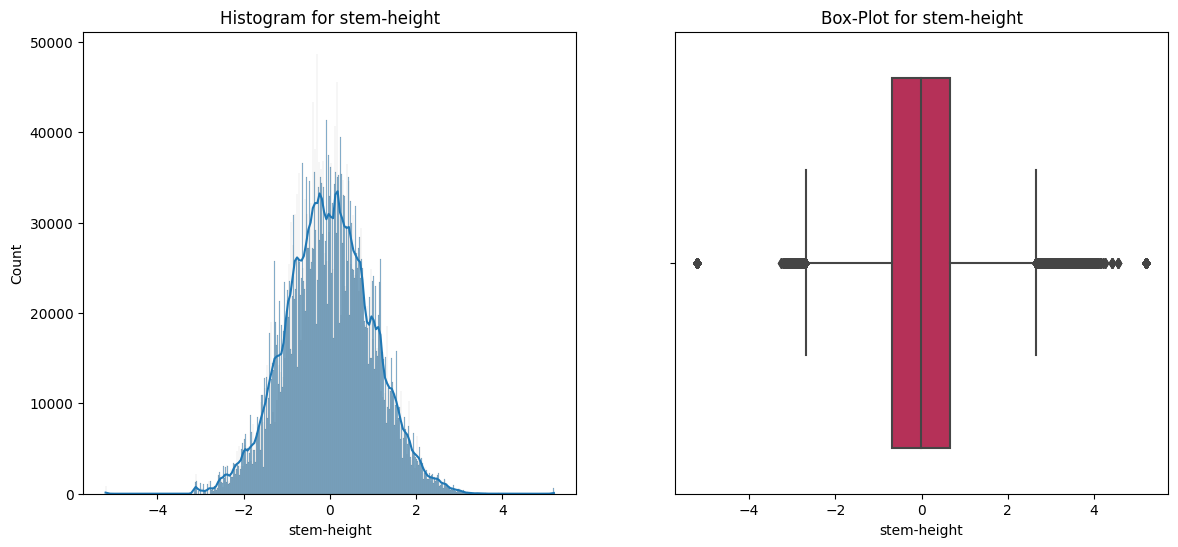

stem-width


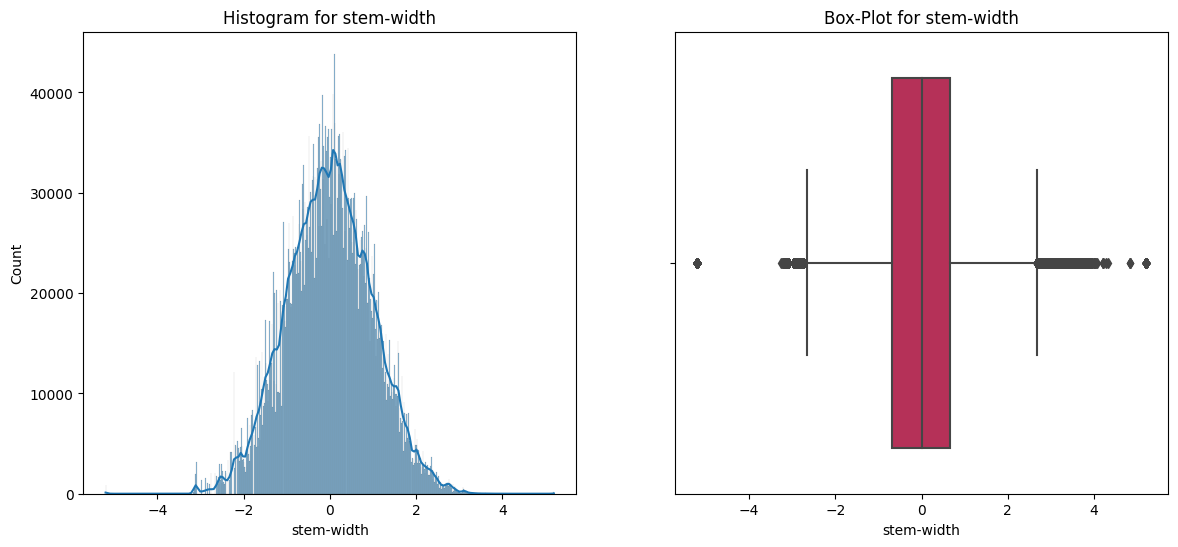

In [51]:
for column in  ['cap-diameter', 'stem-height', 'stem-width']:
    print(column)
    
    plt.figure(figsize=(14,6))
    plt.tight_layout()
    
    plt.subplot(1,2,1)
    sns.histplot(data = com_data[f'{column}'],kde = True, palette = 'viridis')
    plt.xlabel(f'{column}')
    plt.axis()
    plt.title(f'Histogram for {column}')
    
    plt.subplot(1,2,2)
    sns.boxplot(data = com_data,x=com_data[f'{column}'],width = 0.8,palette = 'rocket',color = 'red')
    plt.xlabel(f'{column}')
    plt.title(f'Box-Plot for {column}')
    
    plt.show()

In [52]:
# Calculate the mean and standard deviation for each column
mean = com_data[col].mean()
std = com_data[col].std()

mean, std

(cap-diameter   -0.014924
 stem-height    -0.006681
 stem-width     -0.002363
 dtype: float64,
 cap-diameter    0.994091
 stem-height     0.992952
 stem-width      0.993203
 dtype: float64)

In [53]:
col = ['cap-diameter', 'stem-height', 'stem-width']
# Identify outliers
outliers = (com_data[col] < (mean - 3 * std)) | (com_data[col] > (mean + 3 * std))

# Remove outliers from the dataframe
com_data = com_data[~(outliers.any(axis=1))]


cap-diameter


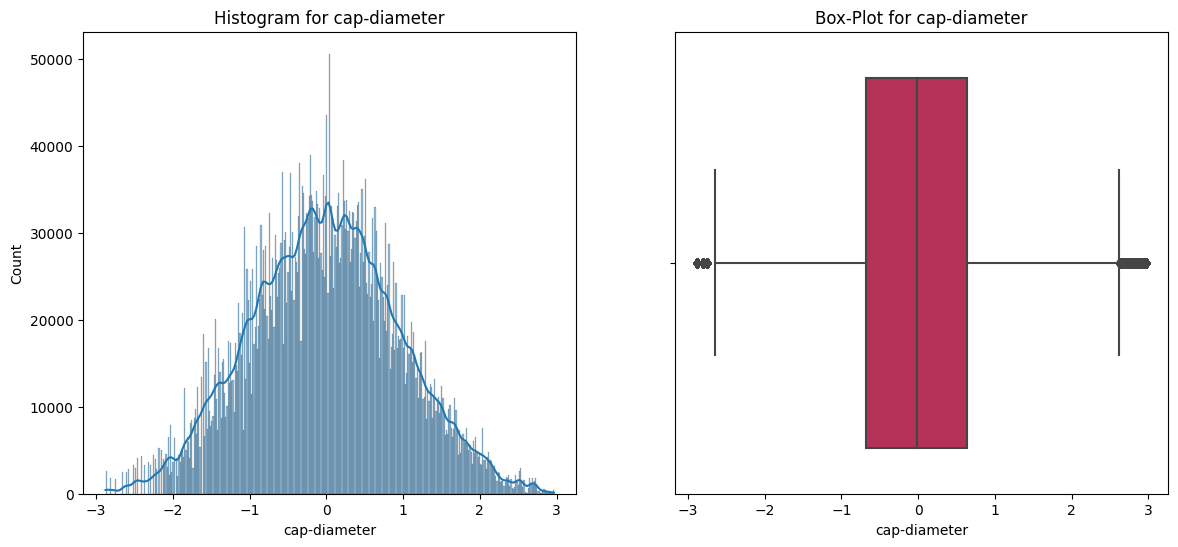

stem-height


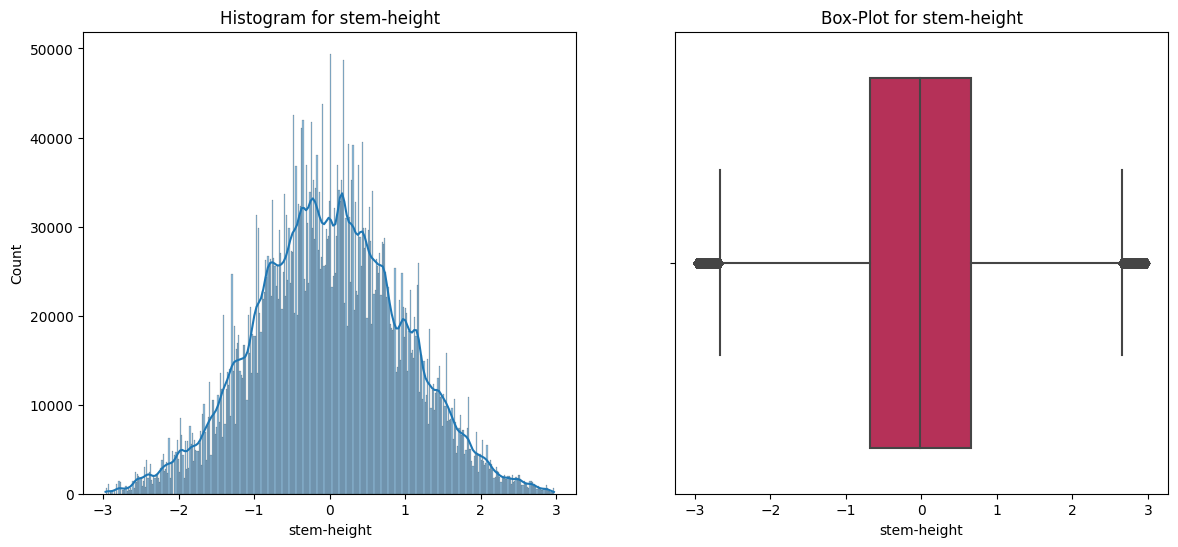

stem-width


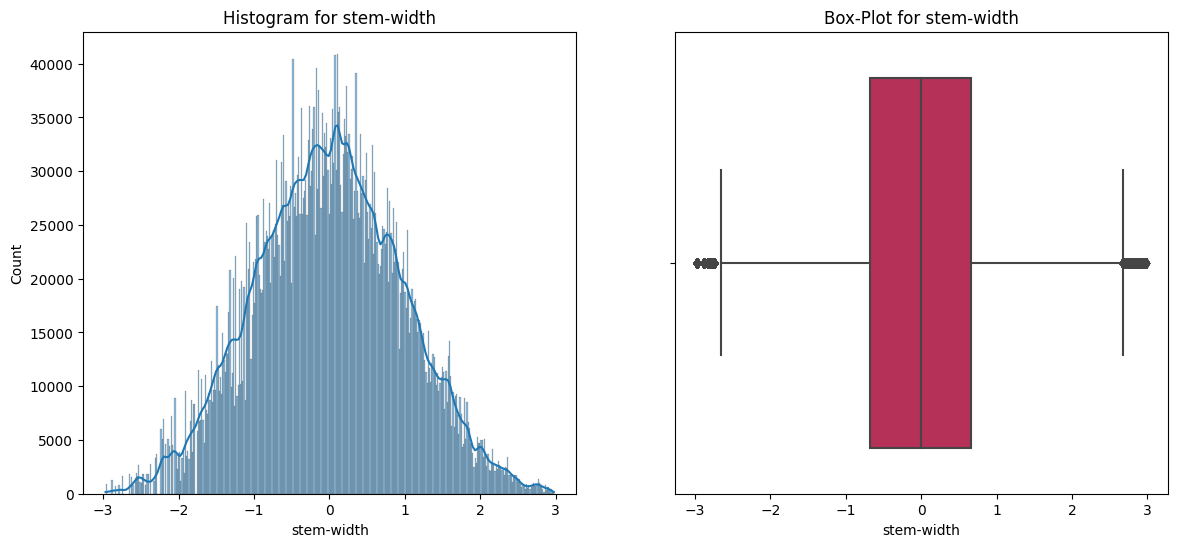

In [54]:
for column in com_data.select_dtypes(include = ['float64']).columns:
    print(column)
    
    plt.figure(figsize=(14,6))
    plt.tight_layout()
    
    plt.subplot(1,2,1)
    sns.histplot(data = com_data[f'{column}'],kde = True, palette = 'viridis')
    plt.xlabel(f'{column}')
    plt.axis()
    plt.title(f'Histogram for {column}')
    
    plt.subplot(1,2,2)
    sns.boxplot(data = com_data,x=com_data[f'{column}'],width = 0.8,palette = 'rocket',color = 'red')
    plt.xlabel(f'{column}')
    plt.title(f'Box-Plot for {column}')
    
    plt.show()

In [55]:
print(com_data.shape)
print()
print(com_data.isna().sum())
print()
print(com_data.info)

(5152813, 18)

id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-surface            0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

<bound method DataFrame.info of               id  class  cap-diameter  cap-shape  cap-surface  cap-color  \
0              0      1      0.790168          1            1          1   
1              1      2     -0.254902          2            2          2   
2              2      1      0.290058          1            1          3   
3              3      1     -0.454249          1            3          4   
4              4      1      0.014921          2            4          5   
...          ..

In [56]:
com_data.to_csv('com_data_with_removed_noise_encoded_cat_removed_outliers.csv')

In [57]:
com_data

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,0,1,0.790168,1,1,1,1,1,1,1,-0.778225,0.639462,1,1,1,1,1,1
1,1,2,-0.254902,2,2,2,1,1,1,2,-0.598435,-0.395204,2,2,2,2,1,2
2,2,1,0.290058,1,1,3,1,2,1,1,0.452858,0.041413,1,3,1,1,2,2
3,3,1,-0.454249,1,3,4,1,3,1,3,-0.941700,-0.385726,1,1,1,1,1,3
4,4,1,0.014921,2,4,5,1,4,1,1,-1.449682,-0.111890,1,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194904,5194904,2,-2.033104,2,7,5,1,1,2,1,-2.028405,-1.900790,1,5,1,1,1,3
5194905,5194905,2,-0.791884,2,1,5,1,4,1,1,-2.019140,-0.226489,1,1,1,1,3,1
5194906,5194906,2,-0.016310,2,6,7,1,1,1,1,0.163824,0.012546,1,4,2,2,1,1
5194907,5194907,2,-0.163824,4,7,6,1,1,2,3,0.069056,-0.884593,1,9,1,1,1,1


In [58]:
# com_data['class'] = com_data['class'].map({1: 0, 2: 1})
# com_data['class'] = com_data.astype('int64')

In [59]:
com_data['class'] = com_data['class'].map({1:0, 2:1})
com_data

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,0,0,0.790168,1,1,1,1,1,1,1,-0.778225,0.639462,1,1,1,1,1,1
1,1,1,-0.254902,2,2,2,1,1,1,2,-0.598435,-0.395204,2,2,2,2,1,2
2,2,0,0.290058,1,1,3,1,2,1,1,0.452858,0.041413,1,3,1,1,2,2
3,3,0,-0.454249,1,3,4,1,3,1,3,-0.941700,-0.385726,1,1,1,1,1,3
4,4,0,0.014921,2,4,5,1,4,1,1,-1.449682,-0.111890,1,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194904,5194904,1,-2.033104,2,7,5,1,1,2,1,-2.028405,-1.900790,1,5,1,1,1,3
5194905,5194905,1,-0.791884,2,1,5,1,4,1,1,-2.019140,-0.226489,1,1,1,1,3,1
5194906,5194906,1,-0.016310,2,6,7,1,1,1,1,0.163824,0.012546,1,4,2,2,1,1
5194907,5194907,1,-0.163824,4,7,6,1,1,2,3,0.069056,-0.884593,1,9,1,1,1,1


In [60]:
# com_data.info()

In [61]:
data_train_processed = com_data[com_data['id'].isin(data_train2['id'])]
data_train_processed

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,0,0,0.790168,1,1,1,1,1,1,1,-0.778225,0.639462,1,1,1,1,1,1
1,1,1,-0.254902,2,2,2,1,1,1,2,-0.598435,-0.395204,2,2,2,2,1,2
2,2,0,0.290058,1,1,3,1,2,1,1,0.452858,0.041413,1,3,1,1,2,2
3,3,0,-0.454249,1,3,4,1,3,1,3,-0.941700,-0.385726,1,1,1,1,1,3
4,4,0,0.014921,2,4,5,1,4,1,1,-1.449682,-0.111890,1,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,0,0.903301,1,5,6,2,1,1,1,1.806283,1.054199,1,1,2,6,1,3
3116941,3116941,0,1.234857,7,5,5,2,4,1,7,0.391137,1.672271,1,1,1,1,1,3
3116942,3116942,1,0.526417,2,6,7,1,1,1,1,1.252988,0.137542,1,4,2,2,1,1
3116943,3116943,0,0.947580,3,9,6,2,5,1,7,1.166919,0.934915,2,1,2,4,1,3


In [82]:
data_test_processed = com_data[com_data['id'].isin(data_test2['id'])]
data_test_processed =  data_test_processed.drop(['id','class'],axis=1)
data_test_processed

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
3116945,0.754752,2,5,6,2,1,1,1,1.610415,0.839121,1,1,2,6,1,1
3116947,-1.189522,4,7,6,1,1,1,2,0.171458,-0.967422,1,3,1,1,1,4
3116948,-0.613509,2,5,6,1,3,1,2,-0.476619,-0.096753,1,1,2,2,1,3
3116949,0.092972,2,2,8,1,7,1,5,0.419741,0.466803,1,4,2,1,1,3
3116950,-0.275694,2,2,6,1,2,1,2,-0.278302,-0.608973,1,3,2,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194904,-2.033104,2,7,5,1,1,2,1,-2.028405,-1.900790,1,5,1,1,1,3
5194905,-0.791884,2,1,5,1,4,1,1,-2.019140,-0.226489,1,1,1,1,3,1
5194906,-0.016310,2,6,7,1,1,1,1,0.163824,0.012546,1,4,2,2,1,1
5194907,-0.163824,4,7,6,1,1,2,3,0.069056,-0.884593,1,9,1,1,1,1


In [63]:
data_train_processed.to_csv('processed_train_data.csv')
data_test_processed.to_csv('processed_test_data.csv')

In [64]:
# %pip install cuml

In [65]:
from sklearn.model_selection import train_test_split
# from cuml.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef



# import cuml
# import inspect

# # Function to list available classes in cuml
# def list_cuml_algorithms(module):
#     cuml_algorithms = []
#     for name, obj in inspect.getmembers(module):
#         if inspect.isclass(obj):
#             cuml_algorithms.append(name)
#     return cuml_algorithms

# # Get the list of all classes in the cuml module
# cuml_algorithms = list_cuml_algorithms(cuml)

# # Display the list of algorithms
# print("Supported Algorithms in cuML:")
# for algo in cuml_algorithms:
#     print(algo)

In [66]:
y_labels = data_train_processed[['class']]

X = data_train_processed.drop(['id','class'], axis =1)
X

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,0.790168,1,1,1,1,1,1,1,-0.778225,0.639462,1,1,1,1,1,1
1,-0.254902,2,2,2,1,1,1,2,-0.598435,-0.395204,2,2,2,2,1,2
2,0.290058,1,1,3,1,2,1,1,0.452858,0.041413,1,3,1,1,2,2
3,-0.454249,1,3,4,1,3,1,3,-0.941700,-0.385726,1,1,1,1,1,3
4,0.014921,2,4,5,1,4,1,1,-1.449682,-0.111890,1,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,0.903301,1,5,6,2,1,1,1,1.806283,1.054199,1,1,2,6,1,3
3116941,1.234857,7,5,5,2,4,1,7,0.391137,1.672271,1,1,1,1,1,3
3116942,0.526417,2,6,7,1,1,1,1,1.252988,0.137542,1,4,2,2,1,1
3116943,0.947580,3,9,6,2,5,1,7,1.166919,0.934915,2,1,2,4,1,3


In [67]:
y_labels

,class
0,0
1,1
2,0
3,0
4,0
...,...
3116940,0
3116941,0
3116942,1
3116943,0


In [68]:
X.shape, data_test_processed.shape

((3091605, 16), (2061208, 17))

In [69]:
train_X, test_X, train_y, test_y = train_test_split(X, y_labels,test_size = 0.2, random_state = 42)

In [70]:
def mcc_metric(y_pred, dmatrix):
    y_true = dmatrix.get_label()
    y_pred = (y_pred > 0.5).astype(int) 
    mcc = matthews_corrcoef(y_true, y_pred)
    return 'mcc', mcc

In [71]:
from xgboost import XGBClassifier

In [76]:
xgb_model_param = XGBClassifier(                    
    n_estimators= 10000,
    max_bin= 2048,
    colsample_bytree= 0.6,
    reg_lambda= 80,
    verbosity= 2,
    learning_rate=0.1,
    use_label_encoder= False,
    n_jobs= 16,
    tree_method='gpu_hist',  # Enable GPU acceleration
    predictor='gpu_predictor',  # Use GPU for prediction
    device='cuda'  # Explicitly set the device to use CUDA
    
    )

In [77]:
eval_res = {}
xgb_model = xgb_model_param.fit(
    train_X, 
    train_y, 
    eval_set=[(test_X, test_y)],
    eval_metric=mcc_metric,
    verbose=True,
    )

[0]	validation_0-logloss:0.65186	validation_0-mcc:0.29333
[1]	validation_0-logloss:0.61472	validation_0-mcc:0.57775
[2]	validation_0-logloss:0.58470	validation_0-mcc:0.66736
[3]	validation_0-logloss:0.55626	validation_0-mcc:0.73198
[4]	validation_0-logloss:0.52801	validation_0-mcc:0.75973
[5]	validation_0-logloss:0.50365	validation_0-mcc:0.79632
[6]	validation_0-logloss:0.48088	validation_0-mcc:0.81417
[7]	validation_0-logloss:0.45687	validation_0-mcc:0.83027
[8]	validation_0-logloss:0.43740	validation_0-mcc:0.85045
[9]	validation_0-logloss:0.41760	validation_0-mcc:0.85261
[10]	validation_0-logloss:0.39930	validation_0-mcc:0.84242
[11]	validation_0-logloss:0.38185	validation_0-mcc:0.86838
[12]	validation_0-logloss:0.36708	validation_0-mcc:0.89054
[13]	validation_0-logloss:0.35299	validation_0-mcc:0.88800
[14]	validation_0-logloss:0.34017	validation_0-mcc:0.88100
[15]	validation_0-logloss:0.32944	validation_0-mcc:0.89585
[16]	validation_0-logloss:0.31805	validation_0-mcc:0.89857
[17]	va

In [80]:
xgb_model_param.save_model('xgb_model1.json')

In [83]:
test_pred_prob = xgb_model.predict(data_test_processed)
test_predictions = (test_pred_prob > 0.5).astype(int)


In [84]:
test_predictions

array([0, 1, 1, ..., 1, 0, 0])

In [87]:
submission_test = com_data[com_data['id'].isin(data_test2['id'])]

# data_sample_sub['class'] = test_predictions
# submission['class'] = submission['class'].map({0: 'e', 1: 'p'})

# sub.to_csv('submission.csv', index = False)
# pd.read_csv('submission.csv')

In [89]:
submission_test

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
3116945,3116945,1,0.754752,2,5,6,2,1,1,1,1.610415,0.839121,1,1,2,6,1,1
3116947,3116947,1,-1.189522,4,7,6,1,1,1,2,0.171458,-0.967422,1,3,1,1,1,4
3116948,3116948,1,-0.613509,2,5,6,1,3,1,2,-0.476619,-0.096753,1,1,2,2,1,3
3116949,3116949,1,0.092972,2,2,8,1,7,1,5,0.419741,0.466803,1,4,2,1,1,3
3116950,3116950,1,-0.275694,2,2,6,1,2,1,2,-0.278302,-0.608973,1,3,2,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194904,5194904,1,-2.033104,2,7,5,1,1,2,1,-2.028405,-1.900790,1,5,1,1,1,3
5194905,5194905,1,-0.791884,2,1,5,1,4,1,1,-2.019140,-0.226489,1,1,1,1,3,1
5194906,5194906,1,-0.016310,2,6,7,1,1,1,1,0.163824,0.012546,1,4,2,2,1,1
5194907,5194907,1,-0.163824,4,7,6,1,1,2,3,0.069056,-0.884593,1,9,1,1,1,1


In [90]:
submission_test['class'] = test_predictions
submission_test

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
3116945,3116945,0,0.754752,2,5,6,2,1,1,1,1.610415,0.839121,1,1,2,6,1,1
3116947,3116947,1,-1.189522,4,7,6,1,1,1,2,0.171458,-0.967422,1,3,1,1,1,4
3116948,3116948,1,-0.613509,2,5,6,1,3,1,2,-0.476619,-0.096753,1,1,2,2,1,3
3116949,3116949,0,0.092972,2,2,8,1,7,1,5,0.419741,0.466803,1,4,2,1,1,3
3116950,3116950,0,-0.275694,2,2,6,1,2,1,2,-0.278302,-0.608973,1,3,2,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194904,5194904,1,-2.033104,2,7,5,1,1,2,1,-2.028405,-1.900790,1,5,1,1,1,3
5194905,5194905,1,-0.791884,2,1,5,1,4,1,1,-2.019140,-0.226489,1,1,1,1,3,1
5194906,5194906,1,-0.016310,2,6,7,1,1,1,1,0.163824,0.012546,1,4,2,2,1,1
5194907,5194907,0,-0.163824,4,7,6,1,1,2,3,0.069056,-0.884593,1,9,1,1,1,1


In [91]:
submission_test = submission_test[['id','class']]
submission_test

,id,class
3116945,3116945,0
3116947,3116947,1
3116948,3116948,1
3116949,3116949,0
3116950,3116950,0
...,...,...
5194904,5194904,1
5194905,5194905,1
5194906,5194906,1
5194907,5194907,0


In [92]:
submission_test.to_csv('submission_xgb.csv')